### Initial Imports

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import norm, gamma, lognorm, weibull_min, gaussian_kde, skew, genpareto
from scipy.interpolate import make_interp_spline
import seaborn as sns
from copulas.multivariate import GaussianMultivariate
from sklearn.preprocessing import QuantileTransformer
import pymannkendall as mk
from mpl_toolkits.basemap import Basemap
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
import itertools
from itertools import combinations
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Question 1

In [3]:
lee_ferry = pd.read_csv('LeesFerry-monflows-1906-2016.txt', delimiter=' ', header=None)
lee_ferry.columns = ['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
lee_ferry = lee_ferry.set_index('Year')
lee_ferry

,Jan,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1906,244314,292534,678174,1204640,3635101,5014167,2950460,1605086,1503159,739807,503006,353312
1907,356760,377349,789130,1465838,2702179,5967232,5103491,1920787,955414,608812,377467,268130
1908,276192,379543,664762,1041224,1595614,2922360,1924283,1117477,598088,483627,395707,312145
1909,378989,317458,763721,1120492,3349297,7203254,4109919,1880422,1526396,680646,489990,377548
1910,289322,493565,1403871,1730475,3298793,3101705,1373125,866631,630999,616468,445769,345922
...,...,...,...,...,...,...,...,...,...,...,...,...
2012,381442,384326,733774,1222586,1362700,1079225,744933,636178,375426,344045,314021,225025
2013,214584,289629,359208,546319,1965060,1964812,874772,727596,1147550,647503,522374,337385
2014,309820,374229,562920,1269132,2932034,3933465,1527985,899893,788861,881584,466760,423745


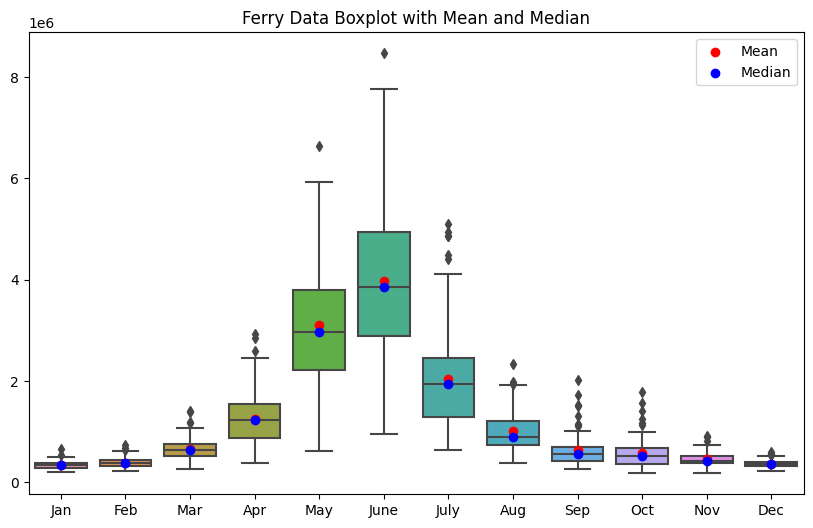

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=lee_ferry)
means = lee_ferry.mean()
medians = lee_ferry.median()

# Plot means and medians
plt.scatter(range(len(means)), means, color='red', label='Mean', zorder=3)
plt.scatter(range(len(medians)), medians, color='blue', label='Median', zorder=3)
plt.title('Ferry Data Boxplot with Mean and Median')
plt.legend(loc='upper right')
plt.show()


## Question 2

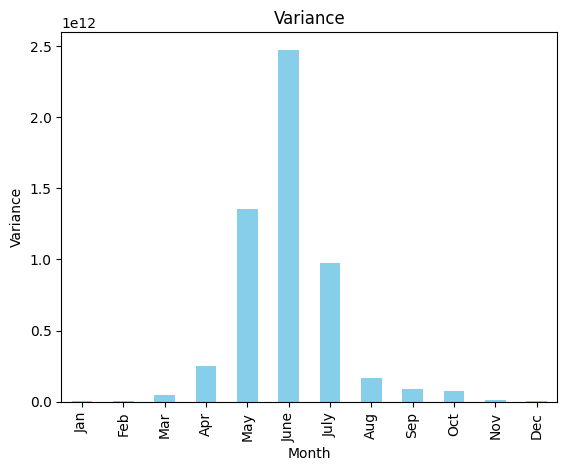

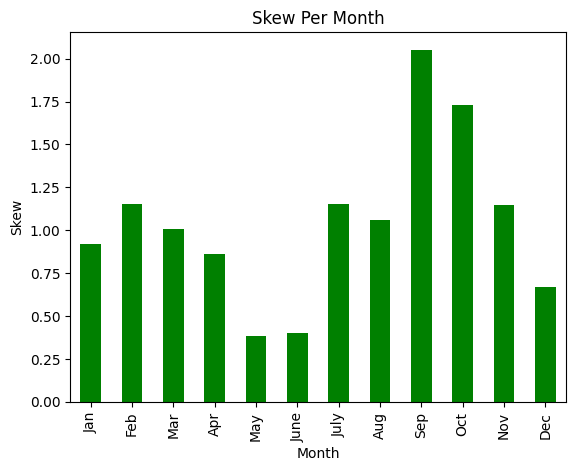

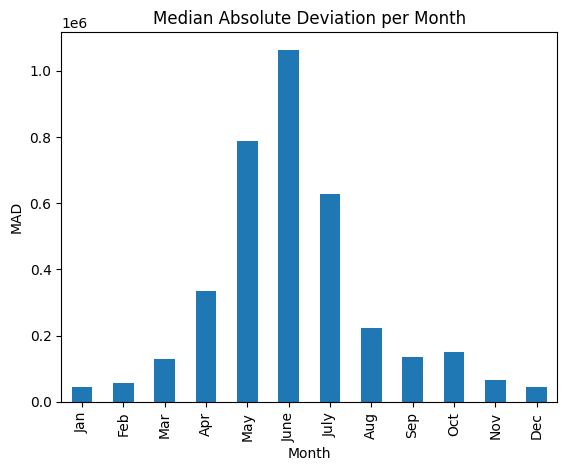

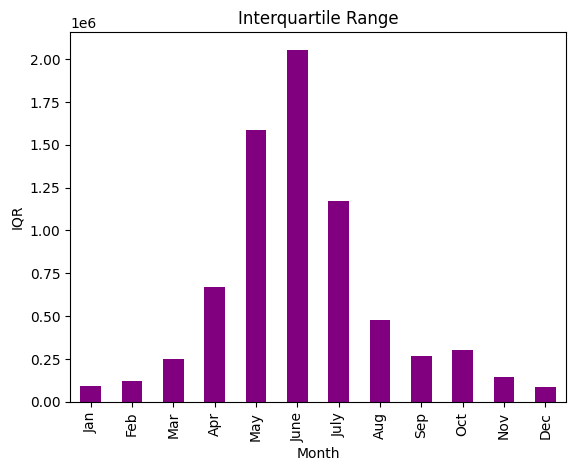

In [11]:
variance = lee_ferry.var()
variance.plot(kind='bar', color='skyblue', title='Variance', xlabel='Month', ylabel='Variance')
plt.show()

# Skewness
skew_values = lee_ferry.apply(lambda col: skew(col.dropna()))
skew_values.plot(kind='bar', color='green', title='Skew Per Month', xlabel='Month', ylabel='Skew')
plt.show()

# Median Absolute Deviation
mad_values = lee_ferry.apply(lambda col: np.median(np.abs(col - np.median(col))))
mad_values.plot(kind='bar', title='Median Absolute Deviation per Month', xlabel='Month', ylabel='MAD')
plt.show()

# Interquartile Range
iqr_values = lee_ferry.apply(lambda col: col.quantile(0.75) - col.quantile(0.25))
iqr_values.plot(kind='bar', color='purple', title='Interquartile Range', xlabel='Month', ylabel='IQR')
plt.show()


## Question 3

In [2]:
lee_ferry = pd.read_csv('LeesFerry-monflows-1906-2016.txt', delimiter=' ', header=None)
lee_ferry.columns = ['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
lee_ferry = lee_ferry.set_index('Year')
lee_ferry

,Jan,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1906,244314,292534,678174,1204640,3635101,5014167,2950460,1605086,1503159,739807,503006,353312
1907,356760,377349,789130,1465838,2702179,5967232,5103491,1920787,955414,608812,377467,268130
1908,276192,379543,664762,1041224,1595614,2922360,1924283,1117477,598088,483627,395707,312145
1909,378989,317458,763721,1120492,3349297,7203254,4109919,1880422,1526396,680646,489990,377548
1910,289322,493565,1403871,1730475,3298793,3101705,1373125,866631,630999,616468,445769,345922
...,...,...,...,...,...,...,...,...,...,...,...,...
2012,381442,384326,733774,1222586,1362700,1079225,744933,636178,375426,344045,314021,225025
2013,214584,289629,359208,546319,1965060,1964812,874772,727596,1147550,647503,522374,337385
2014,309820,374229,562920,1269132,2932034,3933465,1527985,899893,788861,881584,466760,423745


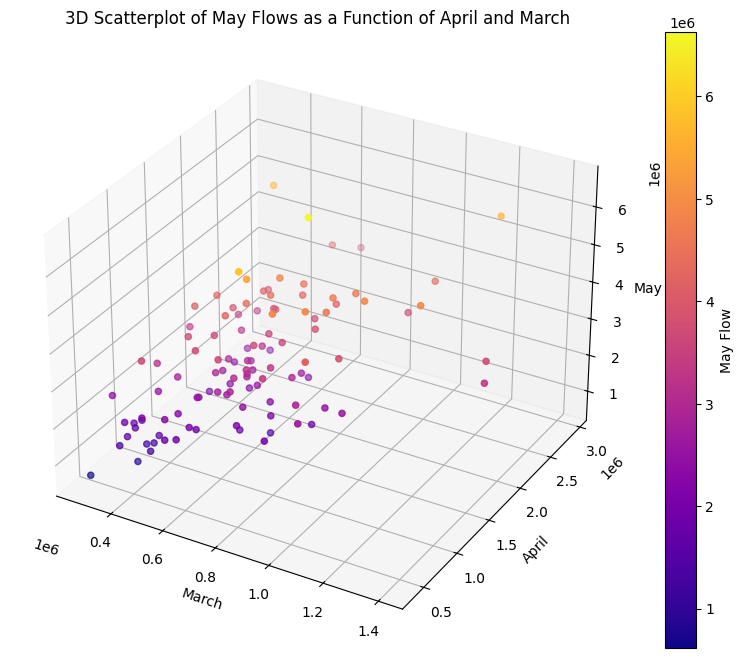

In [3]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(lee_ferry['Mar'], lee_ferry['Apr'], lee_ferry['May'], 
                     c=lee_ferry['May'], cmap='plasma')
fig.colorbar(scatter, label='May Flow')

ax.set_xlabel('March')
ax.set_ylabel('April')
ax.set_zlabel('May')

plt.title('3D Scatterplot of May Flows as a Function of April and March')
plt.show()

## Question 4

# May

In [4]:
may = np.array(lee_ferry['May'])
may_pandas = pd.DataFrame(lee_ferry['May'])
may

array([3635101, 2702179, 1595614, 3349297, 3298793, 2924637, 3684152,
       3270773, 4685651, 2427137, 3736188, 3763312, 2760606, 3231443,
       5917499, 4180109, 4874849, 4029114, 3384372, 2624348, 3686355,
       4348392, 4821916, 4602167, 2225165, 1515196, 4465792, 1743460,
       1509729, 1659496, 4139077, 3944714, 3725399, 2975185, 2559692,
       5436441, 3586298, 2483874, 3684541, 3255617, 1979996, 3702981,
       4108490, 3564293, 2239709, 2133211, 5554490, 1342116, 1804002,
       1993763, 2926653, 2889416, 4780048, 1422316, 2032109, 1695847,
       4111052, 1860875, 2430315, 3336138, 2431492, 1846928, 2211325,
       3765327, 3676415, 2483329, 1982707, 4575588, 3351494, 2780986,
       2512577,  616062, 2767077, 4004959, 4411471, 1246368, 3217893,
       3844250, 6628365, 5606346, 4287464, 3702789, 2199411, 1778580,
       1309652, 2361798, 2497785, 4904073, 2495467, 2642353, 3562190,
       4911189, 3878483, 2833327, 2690228, 3040039,  820372, 2267512,
       2039820, 4162

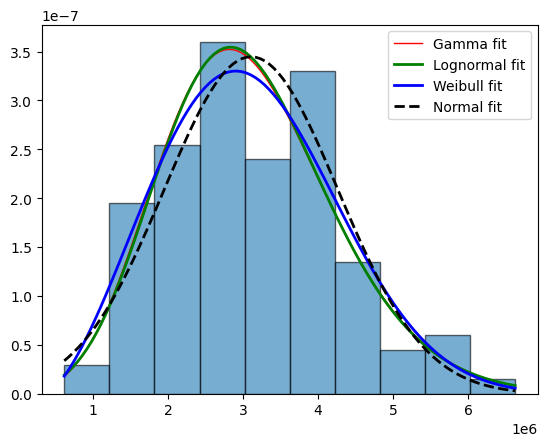

In [5]:
#May
# may = np.array(lee_ferry['May'])
# may_pandas = pd.DataFrame(lee_ferry['May'])


#normal
mean_n, std_n = norm.fit(may)
#gamma
g_fit = gamma.fit(may)
#lognormal
ln_fit = lognorm.fit(may)
#weibull
wb_fit = weibull_min.fit(may)


x = np.linspace(min(may), max(may), 100) #This creates an array of 100 evenly spaced datapoints within the min and max of the given dataset. This then gets fed into the gamma parameters to generate the PDF
plt.hist(may, density=True, alpha = 0.6, edgecolor = 'black')
plt.plot(x, gamma.pdf(x, *g_fit), 'r-', lw=1, label="Gamma fit")
plt.plot(x, lognorm.pdf(x, *ln_fit), 'g-', lw=2, label="Lognormal fit")
plt.plot(x, weibull_min.pdf(x, *wb_fit), 'b-', lw=2, label="Weibull fit")
plt.plot(x, norm.pdf(x, mean_n, std_n), 'k--', lw=2, label="Normal fit")

plt.legend()
plt.show()

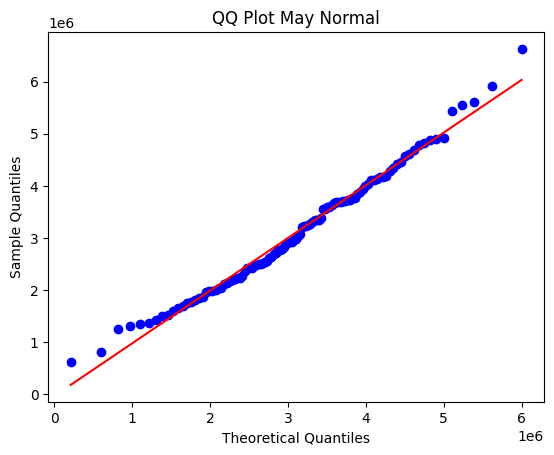

In [6]:
stats.probplot(may, dist="norm", sparams=(mean_n, std_n),plot=plt)
plt.title("QQ Plot May Normal")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

Text(0.5, 1.0, 'QQ Lognormal Distribution')

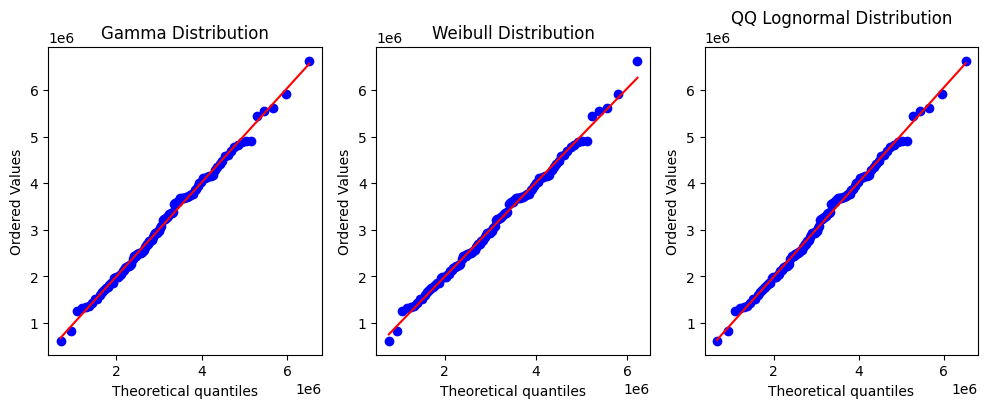

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# QQ plot for Gamma distribution
stats.probplot(may, dist="gamma", sparams=g_fit, plot=axs[0])  # shape=2 for Gamma
axs[0].set_title("Gamma Distribution")

# QQ plot for Weibull distribution
stats.probplot(may, dist="weibull_min", sparams=wb_fit, plot=axs[1])  # shape=1.5 for Weibull
axs[1].set_title("Weibull Distribution")

# QQ plot for Lognormal distribution
stats.probplot(may, dist="lognorm", sparams=ln_fit, plot=axs[2])  # shape=0.5 for Lognormal
axs[2].set_title("QQ Lognormal Distribution")

In [8]:
statistic, p_value = stats.kstest(may, 'norm', args=(mean_n, std_n))
print(f"Normal K-S Statistic: {statistic}")
print(f"Normal P-value: {p_value}")

statistic_gamma, p_value_gamma = stats.kstest(may, 'gamma', args=(g_fit))
print(f"Gamma K-S Statistic: {statistic_gamma}")
print(f"Gamma P-value: {p_value_gamma}")

# Perform the K-S test comparing the sample to the fitted Weibull distribution
statistic_weibull, p_value_weibull = stats.kstest(may, 'weibull_min', args=(wb_fit))
print(f"Weibull K-S Statistic: {statistic_weibull}")
print(f"Weibull P-value: {p_value_weibull}")

# Perform the K-S test comparing the sample to the fitted Lognormal distribution
statistic_lognormal, p_value_lognormal = stats.kstest(may, 'lognorm', args=ln_fit)
print(f"Lognormal K-S Statistic: {statistic_lognormal}")
print(f"Lognormal P-value: {p_value_lognormal}")

Normal K-S Statistic: 0.06007286857476535
Normal P-value: 0.7952783900571778
Gamma K-S Statistic: 0.06541986067118755
Gamma P-value: 0.7040221058892594
Weibull K-S Statistic: 0.051319455258425295
Weibull P-value: 0.9172135633668114
Lognormal K-S Statistic: 0.0656601191463071
Lognormal P-value: 0.6997838322906176


Text(0.5, 1.0, 'May KDE Estimation')

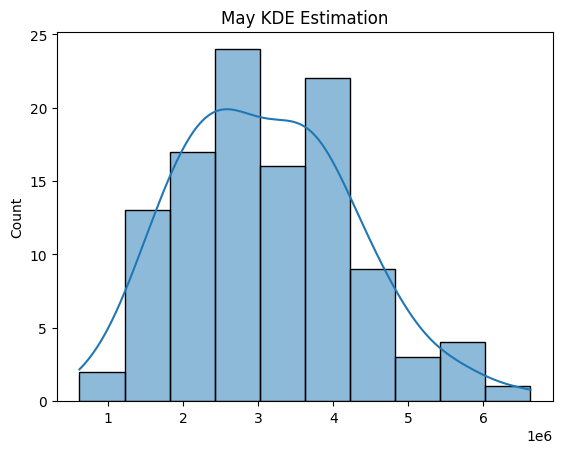

In [9]:
sns.histplot(data = may, kde=True)
plt.title('May KDE Estimation')

## Aug

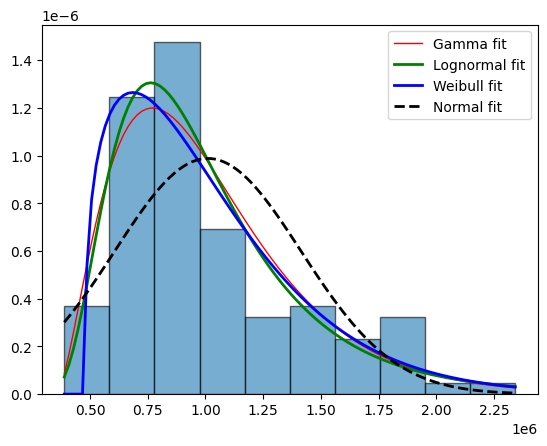

In [10]:
##Aug
Aug = np.array(lee_ferry['Aug'])
#normal
mean_n, std_n = norm.fit(Aug)
#gamma
g_fit = gamma.fit(Aug)
#lognormal
ln_fit = lognorm.fit(Aug)
#weibull
wb_fit = weibull_min.fit(Aug)

x = np.linspace(min(Aug), max(Aug), 100) #This creates an array of 100 evenly spaced datapoints within the min and max of the given dataset. This then gets fed into the gamma parameters to generate the PDF
plt.hist(Aug, density=True, alpha = 0.6, edgecolor = 'black')
plt.plot(x, gamma.pdf(x, *g_fit), 'r-', lw=1, label="Gamma fit")
plt.plot(x, lognorm.pdf(x, *ln_fit), 'g-', lw=2, label="Lognormal fit")
plt.plot(x, weibull_min.pdf(x, *wb_fit), 'b-', lw=2, label="Weibull fit")
plt.plot(x, norm.pdf(x, mean_n, std_n), 'k--', lw=2, label="Normal fit")

plt.legend()
plt.show()

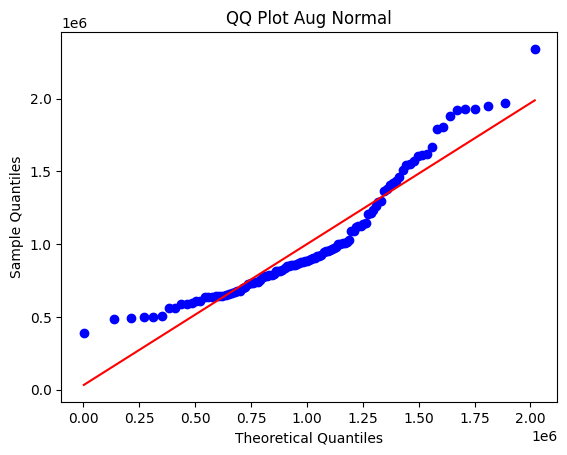

In [11]:
stats.probplot(Aug, dist="norm", sparams=(mean_n, std_n),plot=plt)
plt.title("QQ Plot Aug Normal")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

Text(0.5, 1.0, 'QQ Lognormal Distribution')

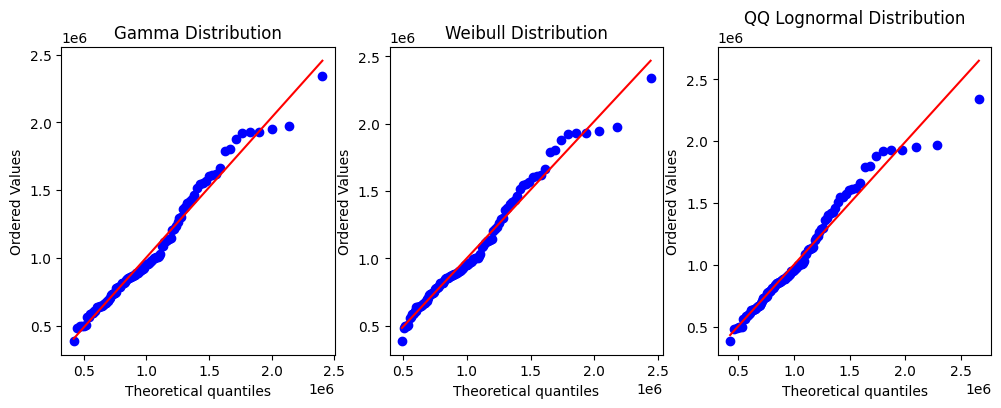

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# QQ plot for Gamma distribution
stats.probplot(Aug, dist="gamma", sparams=g_fit, plot=axs[0])  # shape=2 for Gamma
axs[0].set_title("Gamma Distribution")

# QQ plot for Weibull distribution
stats.probplot(Aug, dist="weibull_min", sparams=wb_fit, plot=axs[1])  # shape=1.5 for Weibull
axs[1].set_title("Weibull Distribution")

# QQ plot for Lognormal distribution
stats.probplot(Aug, dist="lognorm", sparams=ln_fit, plot=axs[2])  # shape=0.5 for Lognormal
axs[2].set_title("QQ Lognormal Distribution")

In [13]:
statistic, p_value = stats.kstest(Aug, 'norm', args=(mean_n, std_n))
print(f"Normal K-S Statistic: {statistic}")
print(f"Normal P-value: {p_value}")

statistic_gamma, p_value_gamma = stats.kstest(Aug, 'gamma', args=(g_fit))
print(f"Gamma K-S Statistic: {statistic_gamma}")
print(f"Gamma P-value: {p_value_gamma}")

# Perform the K-S test comparing the sample to the fitted Weibull distribution
statistic_weibull, p_value_weibull = stats.kstest(Aug, 'weibull_min', args=(wb_fit))
print(f"Weibull K-S Statistic: {statistic_weibull}")
print(f"Weibull P-value: {p_value_weibull}")

# Perform the K-S test comparing the sample to the fitted Lognormal distribution
statistic_lognormal, p_value_lognormal = stats.kstest(Aug, 'lognorm', args=ln_fit)
print(f"Lognormal K-S Statistic: {statistic_lognormal}")
print(f"Lognormal P-value: {p_value_lognormal}")

Normal K-S Statistic: 0.1623153538906797
Normal P-value: 0.0050540268644102505
Gamma K-S Statistic: 0.08203681345518143
Gamma P-value: 0.4213310485865376
Weibull K-S Statistic: 0.07332568706302134
Weibull P-value: 0.5641620179826017
Lognormal K-S Statistic: 0.0634161265536094
Lognormal P-value: 0.7390286494767206


Text(0.5, 1.0, 'Aug KDE Estimation')

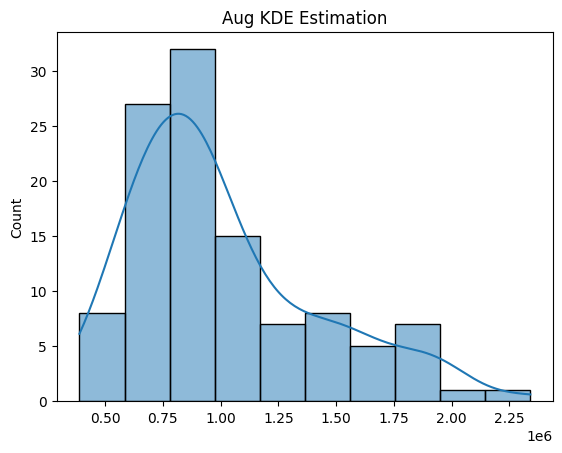

In [14]:
sns.histplot(data = Aug, kde=True)
plt.title('Aug KDE Estimation')

## Dec

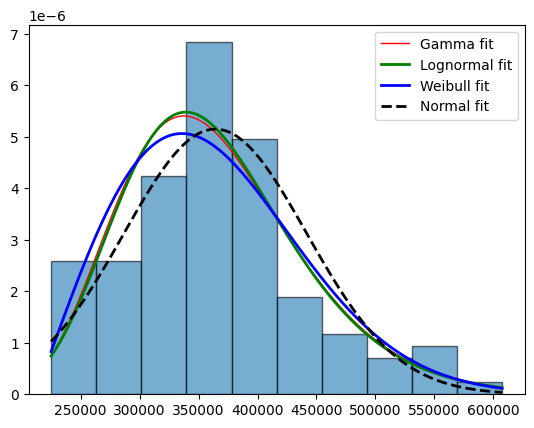

In [15]:
#Dec
Dec = np.array(lee_ferry['Dec'])
#normal
mean_n, std_n = norm.fit(Dec)
#gamma
g_fit = gamma.fit(Dec)
#lognormal
ln_fit = lognorm.fit(Dec)
#weibull
wb_fit = weibull_min.fit(Dec)

x = np.linspace(min(Dec), max(Dec), 100) #This creates an array of 100 evenly spaced datapoints within the min and max of the given dataset. This then gets fed into the gamma parameters to generate the PDF
plt.hist(Dec, density=True, alpha = 0.6, edgecolor = 'black')
plt.plot(x, gamma.pdf(x, *g_fit), 'r-', lw=1, label="Gamma fit")
plt.plot(x, lognorm.pdf(x, *ln_fit), 'g-', lw=2, label="Lognormal fit")
plt.plot(x, weibull_min.pdf(x, *wb_fit), 'b-', lw=2, label="Weibull fit")
plt.plot(x, norm.pdf(x, mean_n, std_n), 'k--', lw=2, label="Normal fit")

plt.legend()
plt.show()

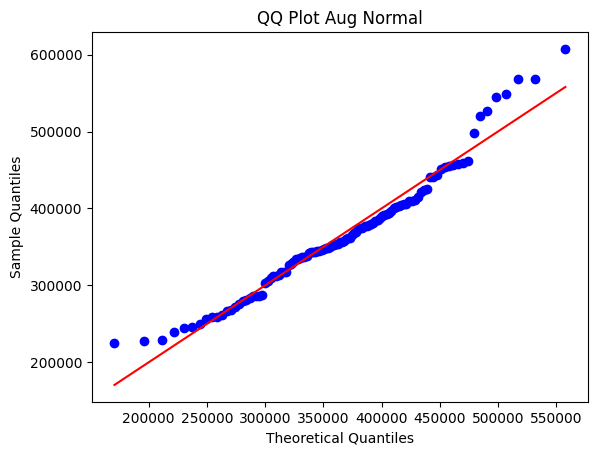

In [16]:
stats.probplot(Dec, dist="norm", sparams=(mean_n, std_n),plot=plt)
plt.title("QQ Plot Aug Normal")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

Text(0.5, 1.0, 'QQ Lognormal Distribution')

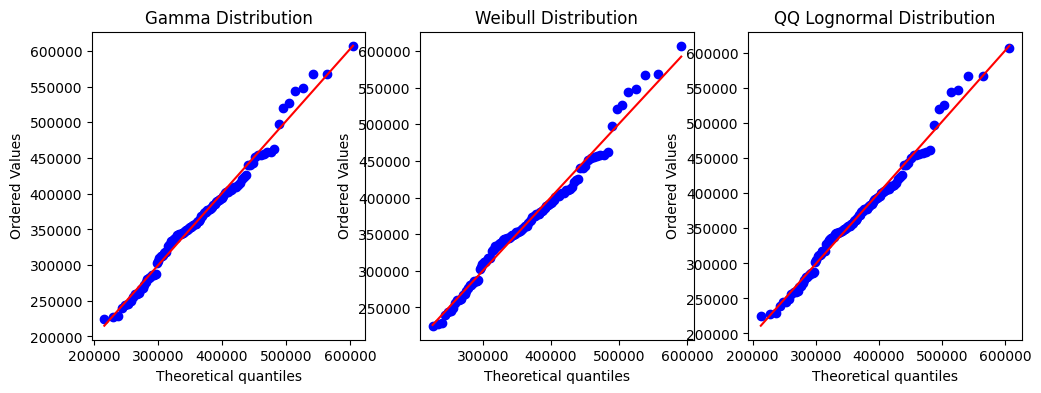

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# QQ plot for Gamma distribution
stats.probplot(Dec, dist="gamma", sparams=g_fit, plot=axs[0])  # shape=2 for Gamma
axs[0].set_title("Gamma Distribution")

# QQ plot for Weibull distribution
stats.probplot(Dec, dist="weibull_min", sparams=wb_fit, plot=axs[1])  # shape=1.5 for Weibull
axs[1].set_title("Weibull Distribution")

# QQ plot for Lognormal distribution
stats.probplot(Dec, dist="lognorm", sparams=ln_fit, plot=axs[2])  # shape=0.5 for Lognormal
axs[2].set_title("QQ Lognormal Distribution")

In [18]:
statistic, p_value = stats.kstest(Dec, 'norm', args=(mean_n, std_n))
print(f"Normal K-S Statistic: {statistic}")
print("Normal P-value: {p_value}")

statistic_gamma, p_value_gamma = stats.kstest(Dec, 'gamma', args=(g_fit))
print(f"Gamma K-S Statistic: {statistic_gamma}")
print(f"Gamma P-value: {p_value_gamma}")

# Perform the K-S test comparing the sample to the fitted Weibull distribution
statistic_weibull, p_value_weibull = stats.kstest(Dec, 'weibull_min', args=(wb_fit))
print(f"Weibull K-S Statistic: {statistic_weibull}")
print(f"Weibull P-value: {p_value_weibull}")

# Perform the K-S test comparing the sample to the fitted Lognormal distribution
statistic_lognormal, p_value_lognormal = stats.kstest(Dec, 'lognorm', args=ln_fit)
print(f"Lognormal K-S Statistic: {statistic_lognormal}")
print(f"Lognormal P-value: {p_value_lognormal}")

Normal K-S Statistic: 0.07232808930305501
Normal P-value: {p_value}
Gamma K-S Statistic: 0.07770585501742899
Gamma P-value: 0.489934874735357
Weibull K-S Statistic: 0.08447837182427537
Weibull P-value: 0.3851882800457106
Lognormal K-S Statistic: 0.07441616172683779
Lognormal P-value: 0.5453134485209159


Text(0.5, 1.0, 'Dec KDE Estimation')

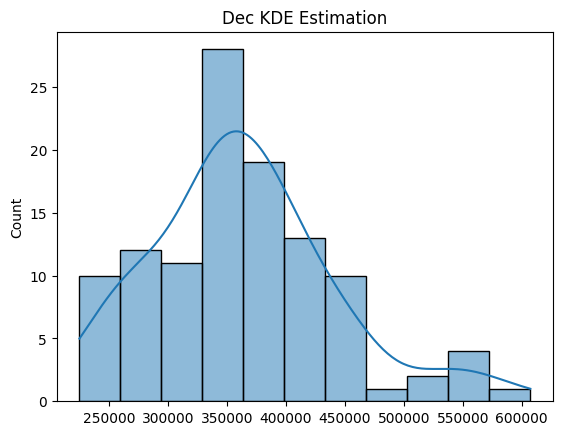

In [19]:
sns.histplot(data = Dec, kde=True)
plt.title('Dec KDE Estimation')

### Question 5

In [20]:
may = np.array(lee_ferry['May'])
may_pandas = pd.DataFrame(lee_ferry['May'])
may

array([3635101, 2702179, 1595614, 3349297, 3298793, 2924637, 3684152,
       3270773, 4685651, 2427137, 3736188, 3763312, 2760606, 3231443,
       5917499, 4180109, 4874849, 4029114, 3384372, 2624348, 3686355,
       4348392, 4821916, 4602167, 2225165, 1515196, 4465792, 1743460,
       1509729, 1659496, 4139077, 3944714, 3725399, 2975185, 2559692,
       5436441, 3586298, 2483874, 3684541, 3255617, 1979996, 3702981,
       4108490, 3564293, 2239709, 2133211, 5554490, 1342116, 1804002,
       1993763, 2926653, 2889416, 4780048, 1422316, 2032109, 1695847,
       4111052, 1860875, 2430315, 3336138, 2431492, 1846928, 2211325,
       3765327, 3676415, 2483329, 1982707, 4575588, 3351494, 2780986,
       2512577,  616062, 2767077, 4004959, 4411471, 1246368, 3217893,
       3844250, 6628365, 5606346, 4287464, 3702789, 2199411, 1778580,
       1309652, 2361798, 2497785, 4904073, 2495467, 2642353, 3562190,
       4911189, 3878483, 2833327, 2690228, 3040039,  820372, 2267512,
       2039820, 4162

In [21]:
shape, loc, scale = gamma.fit(may) #get the fit 
N = 500
gamma_mc = np.random.gamma(shape, scale, N) #use the parameters to generate gamma monte carlo samples 
gamma_mc.shape

(500,)

In [22]:
mean = shape * scale 
variance = shape * scale**2
sd= np.sqrt(variance)
skewness = skew(gamma_mc)
iqr = np.percentile(gamma_mc, 75) - np.percentile(gamma_mc, 25) 
median = np.median(gamma_mc)


Text(1.05, 5368101.255629009, 'iqr:  1527714.74')

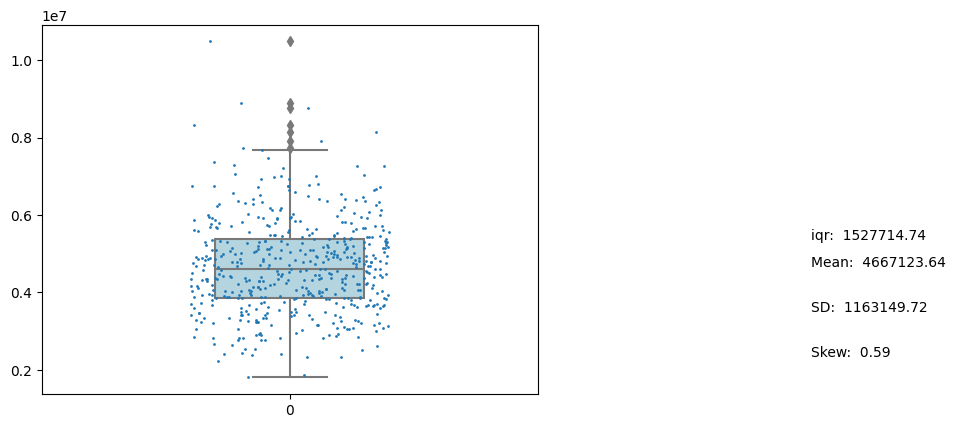

In [23]:
sns.boxplot(data=gamma_mc, color='lightblue', width = 0.3)
sns.stripplot(data=gamma_mc, size=2, jitter = 0.2)
plt.text(1.05, mean, f'Mean: {mean: .2f}') #mean 
plt.text(1.05, mean - sd, f'SD: {sd: .2f}')
plt.text(1.05, mean - 2*sd, f'Skew: {skewness: .2f}')
plt.text(1.05, iqr / 2 + median, f'iqr: {iqr: .2f}')


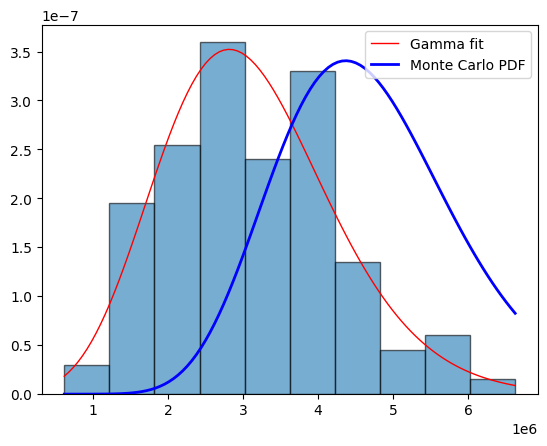

In [24]:
#gamma
g_fit2 = gamma.fit(may)
g_fit3 = gamma.fit(gamma_mc)


x = np.linspace(min(may), max(may), 100) 
plt.hist(may, density=True, alpha = 0.6, edgecolor = 'black')
plt.plot(x, gamma.pdf(x, *g_fit2), 'r-', lw=1, label="Gamma fit")
plt.plot(x, gamma.pdf(x, *g_fit3), 'b-', lw=2, label ='Monte Carlo PDF')

plt.legend()
plt.show()

### Problem 6

In [25]:
def bootstrap(data, num_samples):
    bootstraped_data = []
    for _ in range(num_samples): #does it num_samples amount of time 
        boot_sample = np.random.choice(data, replace=True) #resamples the data with replacement 
        bootstraped_data.append(boot_sample)
    return np.array(bootstraped_data)

data = may 
num_samples = 500
boot_data = bootstrap(may, num_samples)
boot_data

array([2559692, 4287464, 3878483, 2833327, 3079161, 4780048, 3702789,
       6628365, 2483329, 2559692, 2702179, 3298793, 2115387, 2512577,
       3270773, 1342116, 1695847, 2760606, 2760606, 2833327, 3676415,
       3586298, 4685651, 2199411, 2199411, 2430315, 3736188, 3231443,
       2967581, 4602167, 2767077, 2225165, 2760606, 4139077, 2032109,
       3585225, 2361798, 3736188, 1246368, 2133211, 2932034, 4575588,
       3944714, 2430315, 3702789, 3684152, 3725399, 4821916, 3255617,
       1515196, 1860875, 3298793, 2361798, 3384372, 1342116, 2497785,
       3944714, 3231443, 2431492, 2975185,  820372, 4874849, 4911189,
       2175686, 4111052, 3236583, 4348392, 4139077, 2483329, 1422316,
       1515196, 2427137, 2924637, 1965060, 2495467, 3231443, 3040039,
       1979996, 3270773, 2512577, 3336138,  820372, 4161938, 3217893,
       5554490, 3585225, 2702179, 1362700, 4111052, 2497785, 4465792,
       4821916, 5554490,  820372, 2624348, 2361798, 2497785, 6628365,
       1362700, 1743

In [26]:
mean = np.mean(boot_data)
print('Boot Data Mean is:', mean)
# Standard Deviation
std_dev = np.std(boot_data)
print(f"Standard Deviation: {std_dev:.2f}")

# Skew
skewness = stats.skew(boot_data)
print(f"Skewness: {skewness:.2f}")

# IQR
q75, q25 = np.percentile(data, [75, 25])
iqr = q75 - q25
print(f"Interquartile Range (IQR): {iqr:.2f}")

Boot Data Mean is: 3028987.234
Standard Deviation: 1162257.81
Skewness: 0.56
Interquartile Range (IQR): 1586543.50


Text(1.05, 5397515.633251922, 'iqr:  1586543.50')

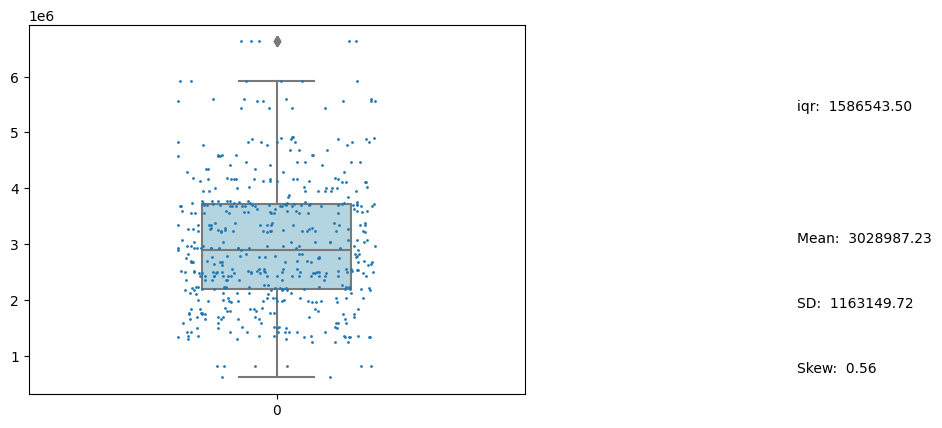

In [27]:
sns.boxplot(data=boot_data, color='lightblue', width = 0.3)
sns.stripplot(data=boot_data, size=2, jitter = 0.2)
plt.text(1.05, mean, f'Mean: {mean: .2f}') #mean 
plt.text(1.05, mean - sd, f'SD: {sd: .2f}')
plt.text(1.05, mean - 2*sd, f'Skew: {skewness: .2f}')
plt.text(1.05, iqr / 2 + median, f'iqr: {iqr: .2f}')


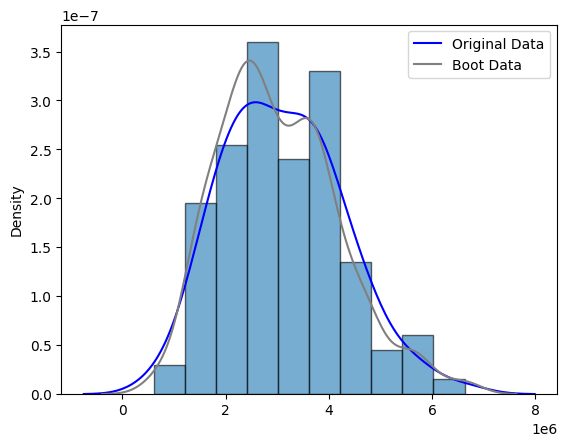

In [28]:
plt.hist(may, density=True, alpha = 0.6, edgecolor = 'black')
sns.kdeplot(may, color='blue', label='Original Data')
sns.kdeplot(boot_data, color='grey', alpha=1, label = 'Boot Data')
plt.legend()

### Problem 7

In [29]:
apr_may_df =lee_ferry[['Apr', 'May']]
apr_may = np.array(apr_may_df)
apr_may

array([[1204640, 3635101],
       [1465838, 2702179],
       [1041224, 1595614],
       [1120492, 3349297],
       [1730475, 3298793],
       [ 951815, 2924637],
       [ 902408, 3684152],
       [1829662, 3270773],
       [1593815, 4685651],
       [1483872, 2427137],
       [1802735, 3736188],
       [1545288, 3763312],
       [ 901047, 2760606],
       [1414719, 3231443],
       [ 983984, 5917499],
       [ 930238, 4180109],
       [1224473, 4874849],
       [1296746, 4029114],
       [1658525, 3384372],
       [1469823, 2624348],
       [1722211, 3686355],
       [1369061, 4348392],
       [1103775, 4821916],
       [1774777, 4602167],
       [1862406, 2225165],
       [ 712221, 1515196],
       [1774718, 4465792],
       [ 579969, 1743460],
       [ 584844, 1509729],
       [ 703982, 1659496],
       [1465536, 4139077],
       [1594216, 3944714],
       [1725164, 3725399],
       [1250651, 2975185],
       [ 780974, 2559692],
       [1151420, 5436441],
       [2925816, 3586298],
 

#### Part A: Fit a Copula and Show the Bivariate Plot Along with the Data

In [30]:
scaler = QuantileTransformer()
transformed = scaler.fit_transform(apr_may)
copula = GaussianMultivariate()
copula.fit(transformed)

/home/anna/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (111). n_quantiles is set to n_samples.
  warnings.warn(
/home/anna/anaconda3/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
/home/anna/anaconda3/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)


In [31]:
x_grid = np.linspace(0, 1, 100)
y_grid = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x_grid, y_grid)
grid_points = np.column_stack([X.ravel(), Y.ravel()])


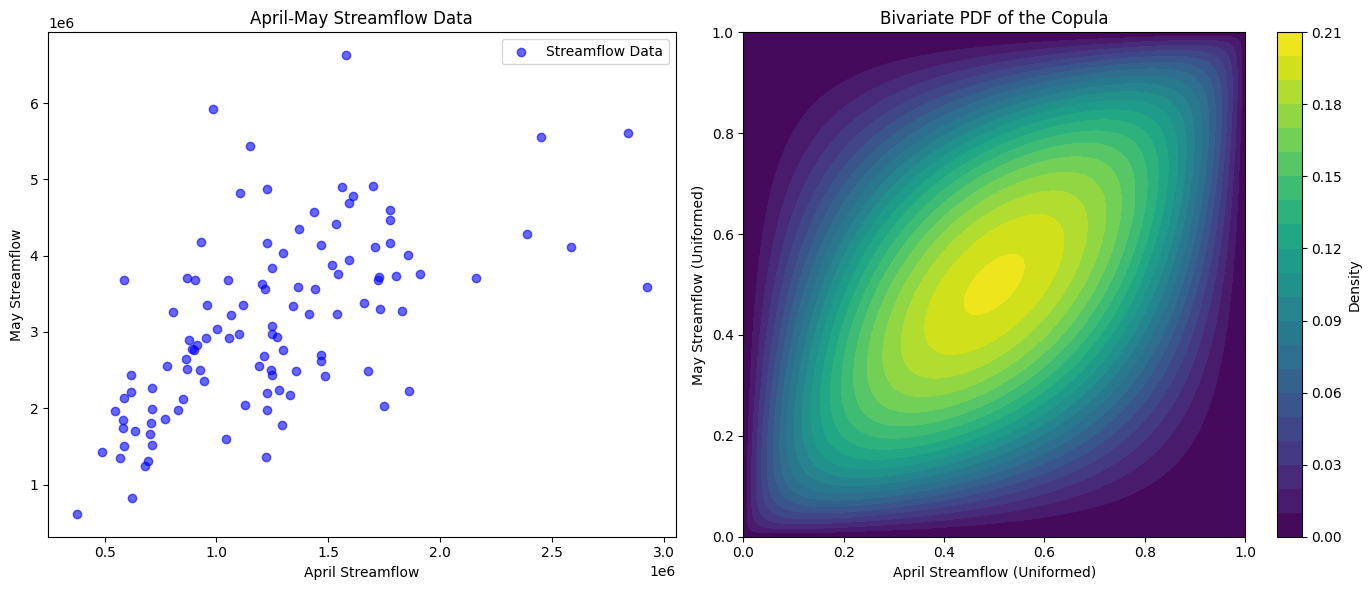

In [32]:
pdf_values = copula.pdf(grid_points).reshape(X.shape)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].scatter(apr_may_df['Apr'].values, apr_may_df['May'].values,  color='blue', alpha=0.6, label='Streamflow Data')
axes[0].set_title("April-May Streamflow Data")
axes[0].set_xlabel("April Streamflow")
axes[0].set_ylabel("May Streamflow")
axes[0].legend()

cp = axes[1].contourf(X, Y, pdf_values, cmap='viridis', levels=20)
axes[1].set_title("Bivariate PDF of the Copula")
axes[1].set_xlabel("April Streamflow (Uniformed)")
axes[1].set_ylabel("May Streamflow (Uniformed)")
fig.colorbar(cp, ax=axes[1], label="Density")
plt.tight_layout()
plt.show()

#### Part B: Generate 500 Samples, Boxplot the statistics and PDF's from the simluations along with that of the historic data for April and May Flow

Copula Samples Mean is: 1230902.7368016804
Copula STD is 505542.6527928375
Skewness 0.9211638911555169
Interquartile Range (IQR): 668147.6220611375


Text(0.5, 4938317.694282491, 'iqr:  668147.62')

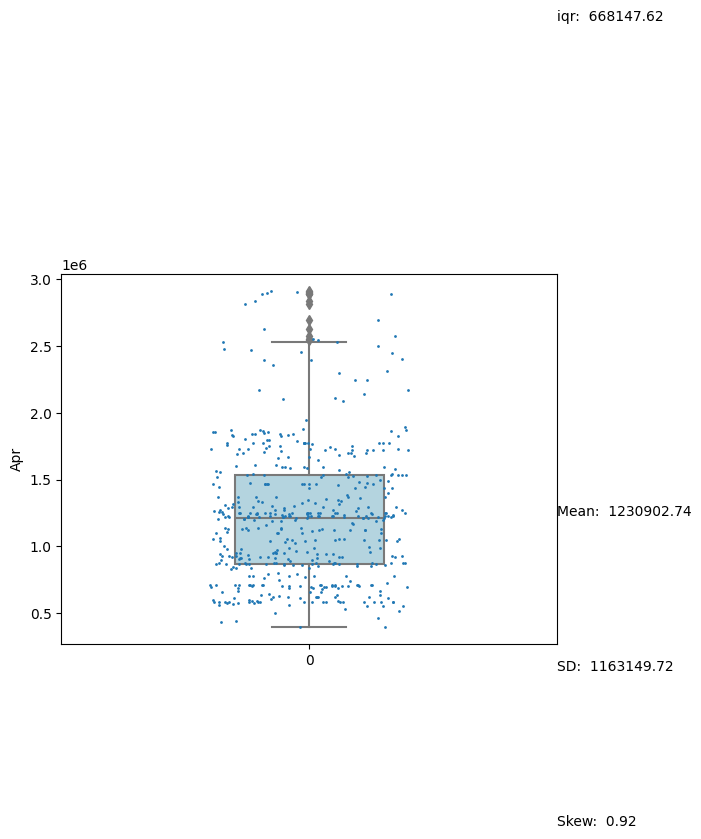

In [33]:
generated_samples = copula.sample(500)
generated_data = scaler.inverse_transform(generated_samples)
generated_data_df = pd.DataFrame(generated_data)
generated_data_df.columns= ['Apr', 'May']
generated_data_df


mean = np.mean(generated_data_df['Apr'])
print('Copula Samples Mean is:', mean)
# Standard Deviation
std_dev = np.std(generated_data_df['Apr'])
print('Copula STD is', std_dev)

# Skew
skewness = stats.skew(generated_data_df['Apr'])
print('Skewness', skewness)

# IQR
q75, q25 = np.percentile(generated_data_df['Apr'], [75, 25])
iqr = q75 - q25
print('Interquartile Range (IQR):', iqr)

sns.boxplot(data=generated_data_df['Apr'], color='lightblue', width = 0.3)
sns.stripplot(data=generated_data_df['Apr'], size=2, jitter = 0.2)
plt.text(0.5, mean, f'Mean: {mean: .2f}') #mean 
plt.text(0.5, mean - sd, f'SD: {sd: .2f}')
plt.text(0.5, mean - 2*sd, f'Skew: {skewness: .2f}')
plt.text(0.5, iqr / 2 + median, f'iqr: {iqr: .2f}')

Copula Samples Mean is: 3114785.827100375
Copula STD is 1131885.5471722616
Skewness 0.3768230572672496
Interquartile Range (IQR): 1561986.0889210785


Text(1.05, 5385236.927712461, 'iqr:  1561986.09')

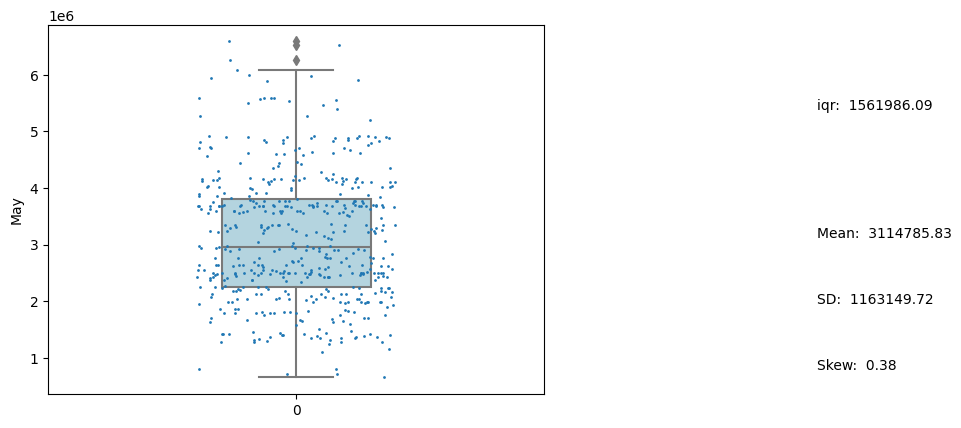

In [34]:
mean = np.mean(generated_data_df['May'])
print('Copula Samples Mean is:', mean)
# Standard Deviation
std_dev = np.std(generated_data_df['May'])
print('Copula STD is', std_dev)

# Skew
skewness = stats.skew(generated_data_df['May'])
print('Skewness', skewness)

# IQR
q75, q25 = np.percentile(generated_data_df['May'], [75, 25])
iqr = q75 - q25
print('Interquartile Range (IQR):', iqr)

sns.boxplot(data=generated_data_df['May'], color='lightblue', width = 0.3)
sns.stripplot(data=generated_data_df['May'], size=2, jitter = 0.2)
plt.text(1.05, mean, f'Mean: {mean: .2f}') #mean 
plt.text(1.05, mean - sd, f'SD: {sd: .2f}')
plt.text(1.05, mean - 2*sd, f'Skew: {skewness: .2f}')
plt.text(1.05, iqr / 2 + median, f'iqr: {iqr: .2f}')

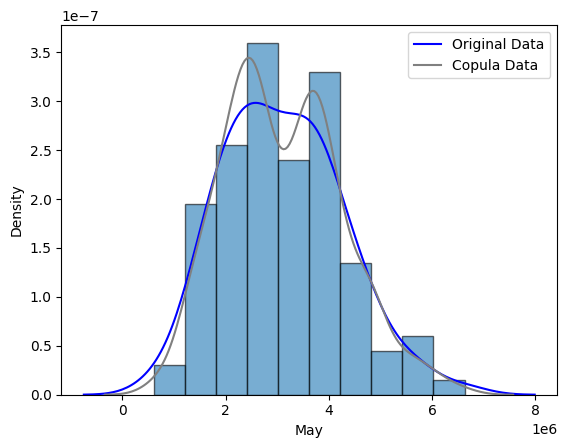

In [35]:
plt.hist(may, density=True, alpha = 0.6, edgecolor = 'black')
sns.kdeplot(may, color='blue', label='Original Data')
sns.kdeplot(data=generated_data_df['May'], color='grey', alpha=1, label = 'Copula Data')
plt.legend()



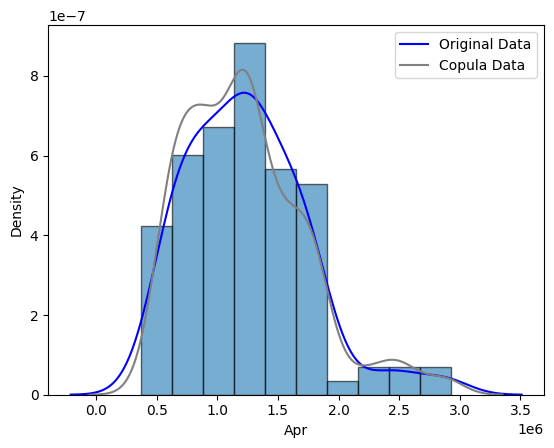

In [36]:
apr = lee_ferry['Apr']
plt.hist(apr, density=True, alpha = 0.6, edgecolor = 'black')
sns.kdeplot(apr, color='blue', label='Original Data')
sns.kdeplot(generated_data_df['Apr'], color='grey', alpha=1, label = 'Copula Data')
plt.legend()

#### Problem 8

In [37]:
chippewa = pd.read_excel('/home/anna/Desktop/Engineering-Probability---Statistics/Chippewa River StreamFlow Data.xls')
chippewa = chippewa.set_index('Year')
chippewa = chippewa.iloc[:111]
chippewa_streamflow = chippewa['StreamFlow'].values

#### A) Gumbel EV-1 Distribution

In [38]:
fit = stats.gumbel_r.fit(chippewa_streamflow)
fit
estimate = stats.gumbel_r.ppf(1 - 1/500, *fit)
estimate

31648.464915056327

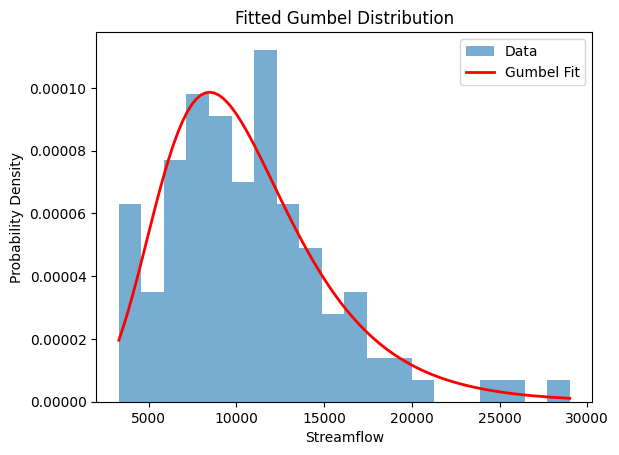

In [39]:
x = np.linspace(min(chippewa_streamflow), max(chippewa_streamflow), 100)
plt.hist(chippewa_streamflow, bins=20, density=True, alpha=0.6, label='Data')

#Plot the fitted Gumbel distribution
plt.plot(x, stats.gumbel_r.pdf(x, *fit), 'r-', lw=2, label='Gumbel Fit')

plt.xlabel('Streamflow')
plt.ylabel('Probability Density')
plt.title('Fitted Gumbel Distribution')
plt.legend()
plt.show()



#### B) Log-Pearson Type 3

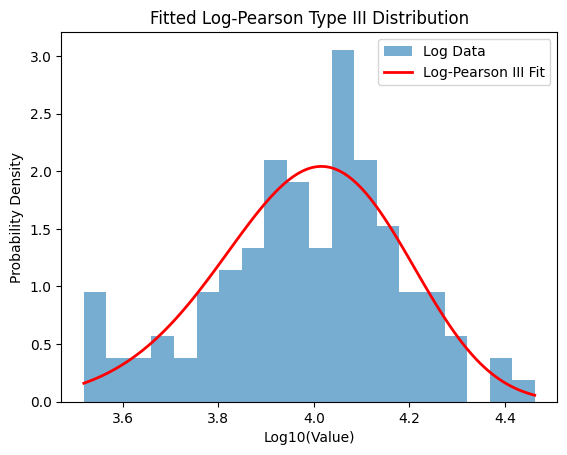

In [40]:
log_data = np.log10(chippewa_streamflow)

# Fit the Pearson Type III distribution to the log-transformed data
shape, loc, scale = stats.pearson3.fit(log_data)

# Generate x values for plotting
x = np.linspace(min(log_data), max(log_data), 100)

# Plot histogram of log-transformed data
plt.hist(log_data, bins=20, density=True, alpha=0.6, label='Log Data')

# Plot the fitted Log-Pearson Type III distribution
plt.plot(x, stats.pearson3.pdf(x, shape, loc, scale), 'r-', lw=2, label='Log-Pearson III Fit')

plt.xlabel('Log10(Value)')
plt.ylabel('Probability Density')
plt.title('Fitted Log-Pearson Type III Distribution')
plt.legend()
plt.show()

In [41]:
log_estimate = stats.pearson3.ppf(1 - 1/500, shape, loc=loc, scale=scale)
estimate = np.exp(log_estimate)
estimate


87.58563247013053

### C) Log Normal

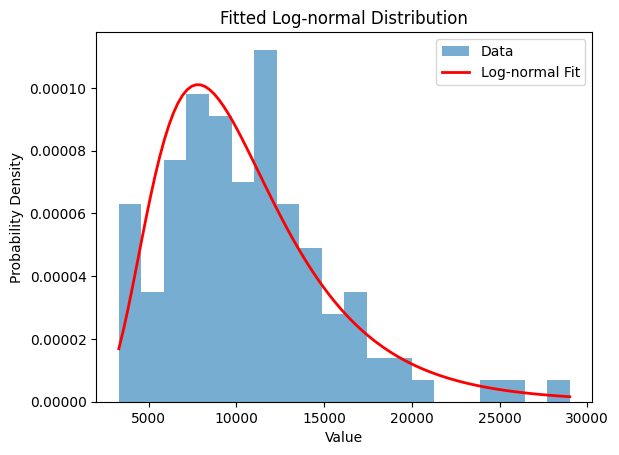

In [42]:
shape, loc, scale = stats.lognorm.fit(chippewa_streamflow, floc=0)

# Generate x values for plotting
x = np.linspace(min(chippewa_streamflow), max(chippewa_streamflow), 100)

# Plot histogram of data
plt.hist(chippewa_streamflow, bins=20, density=True, alpha=0.6, label='Data')

# Plot the fitted log-normal distribution
plt.plot(x, stats.lognorm.pdf(x, shape, loc, scale), 'r-', lw=2, label='Log-normal Fit')

plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Fitted Log-normal Distribution')
plt.legend()
plt.show()

In [43]:
return_levels = stats.lognorm.ppf(1 - 1/np.array(500), shape, loc, scale)
return_levels

35665.545387581835

### D) Generalized Extreme Value Distributions

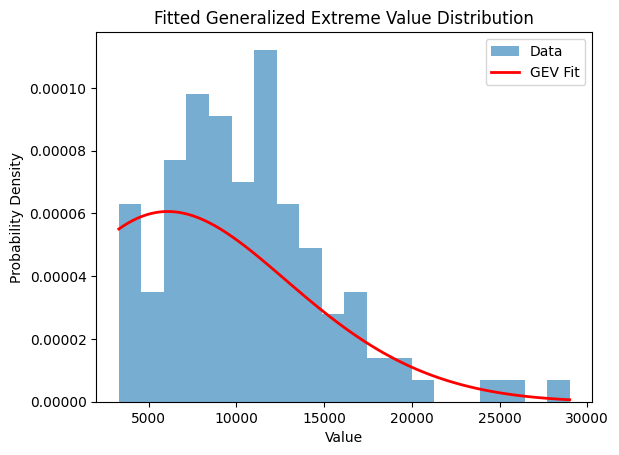

Shape: 0.1811
Location: 4877.0045
Scale: 6175.6374


In [44]:
shape, loc, scale = stats.genextreme.fit(chippewa_streamflow)

# Generate x values for plotting
x = np.linspace(min(chippewa_streamflow), max(chippewa_streamflow), 100)

# Plot histogram of data
plt.hist(chippewa_streamflow, bins=20, density=True, alpha=0.6, label='Data')

# Plot the fitted GEV distribution
plt.plot(x, stats.genextreme.pdf(x, shape, loc, scale), 'r-', lw=2, label='GEV Fit')

plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Fitted Generalized Extreme Value Distribution')
plt.legend()
plt.show()

# Print the fitted parameters
print(f"Shape: {shape:.4f}")
print(f"Location: {loc:.4f}")
print(f"Scale: {scale:.4f}")

In [45]:
return_levels = stats.genextreme.ppf(1 - 1/np.array(50), shape, loc, scale)
return_levels

22156.259335851704

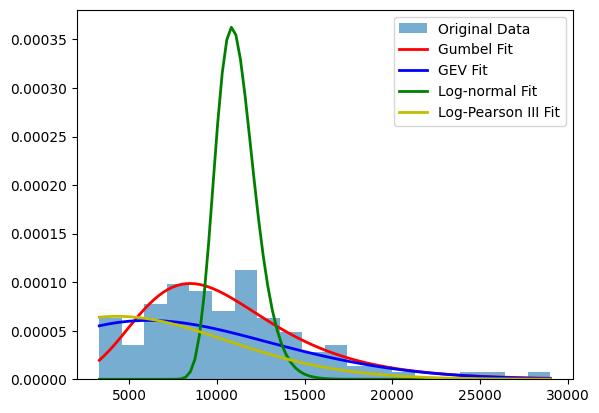

In [46]:
plt.hist(chippewa_streamflow, bins=20, density=True, alpha=0.6, label='Original Data')

#Plot the fitted Gumbel distribution
plt.plot(x, stats.gumbel_r.pdf(x, *fit), 'r-', lw=2, label='Gumbel Fit')
plt.plot(x, stats.genextreme.pdf(x, shape, loc, scale), 'b-', lw=2, label='GEV Fit')
plt.plot(x, stats.lognorm.pdf(x, shape, loc, scale), 'g-', lw=2, label='Log-normal Fit')
plt.plot(x, stats.pearson3.pdf(x, shape, loc, scale), 'y-', lw=2, label='Log-Pearson III Fit')
plt.legend()
plt.show()


Text(0.5, 1.0, 'Pearson Type III Distribution')

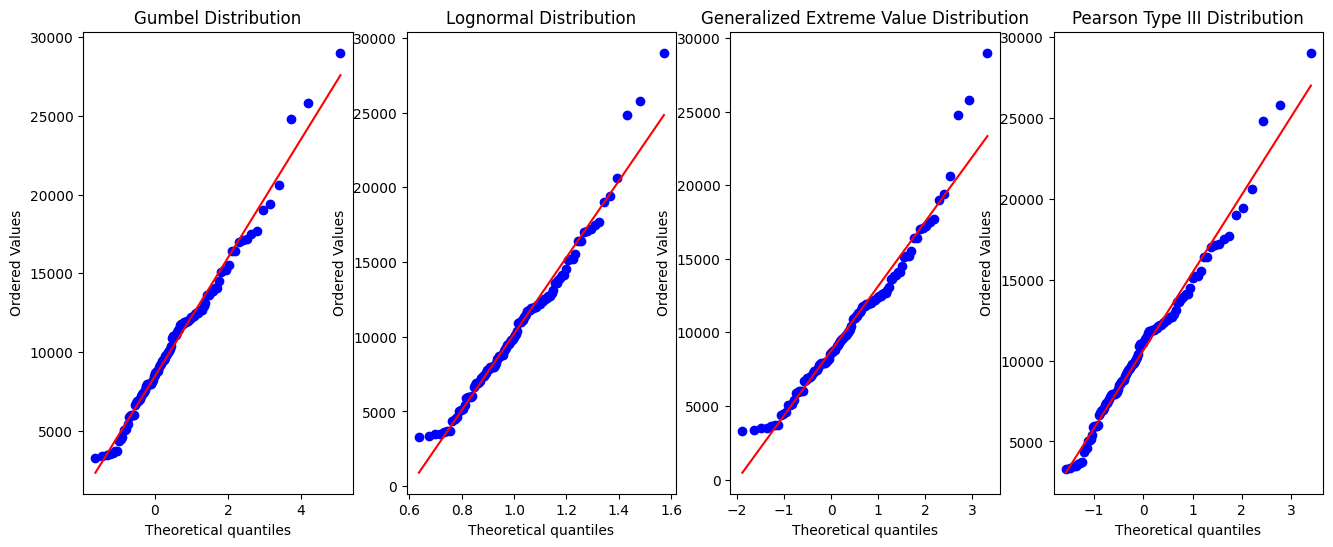

In [47]:
fig, axs = plt.subplots(1, 4, figsize=(16, 6))

# QQ plot for Gamma distribution
stats.probplot(chippewa_streamflow, dist="gumbel_r", plot=axs[0])
axs[0].set_title("Gumbel Distribution")

# QQ plot for Lognormal distribution
stats.probplot(chippewa_streamflow, dist=stats.lognorm(s=shape), plot=axs[1])
axs[1].set_title("Lognormal Distribution")

# QQ plot for Generalized Extreme Value distribution
stats.probplot(chippewa_streamflow, dist=stats.genextreme(shape), plot=axs[2])
axs[2].set_title("Generalized Extreme Value Distribution")

# QQ plot for Pearson Type III distribution
skew = stats.skew(chippewa_streamflow)
stats.probplot(chippewa_streamflow, dist=stats.pearson3(skew), plot=axs[3])
axs[3].set_title("Pearson Type III Distribution")

### Problem 9

In [48]:
h1 = pd.read_excel('US-HurrDamage-Landsea-etal-2018.xlsx')
h2 = h1.set_index(['Year'])
h3 = h2 / 10**9
h4 = h3[(h3['PL18 Sum for Year'] >5) & (h3['CL18 Sum for Year'] >5)]

Shape, loc, and scale parameters for threshold 5 are 0.701393853522982 5.452438566437497 14.25044099673539


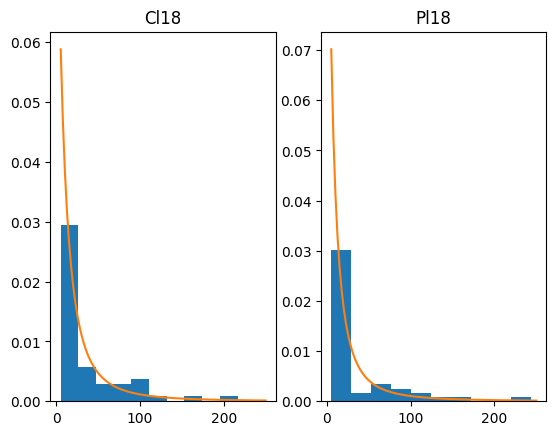

In [49]:
Pl18 = h4['PL18 Sum for Year'].values
Cl18 = h4['CL18 Sum for Year'].values
shape1, loc1, scale1 = genpareto.fit(Pl18)
shape2, loc2, scale2 = genpareto.fit(Cl18)
x1 = np.linspace(loc1, 250, 100)
x2 = np.linspace(loc2, 250, 100)

pdf1 = genpareto.pdf(x1, c=shape1, loc=loc1, scale=scale1)
pdf2 = genpareto.pdf(x2, c=shape2, loc=loc2, scale=scale2)
plt.subplot(1,2,2)
plt.hist(Pl18, density=True)
plt.plot(x1, pdf1)
plt.title('Pl18')
plt.subplot(1,2,1)
plt.hist(Cl18, density = True)
plt.plot(x2, pdf2)
plt.title('Cl18')

print('Shape, loc, and scale parameters for threshold 5 are', shape1, loc1, scale1)

### 100 year return period

In [50]:
T = 100  # in years
p = 1 / T  # Exceedance probability

# Compute the 100-year return level
return_level = stats.genpareto.ppf(1 - p, c=shape1, scale=scale1, loc=loc1)
return_level2 = stats.genpareto.ppf(1 - p, c=shape2, scale=scale2, loc=loc2)

print('Return level for PL18', return_level)
print('Return level for CL18', return_level2)


Return level for PL18 498.7694666792814
Return level for CL18 394.1126733557065


### Model fit with 2 and 6 thresholds

Shape, loc, and scale parameters for threshold 2 are 0.6420592174416839 2.0054881810684257 13.719606469666026


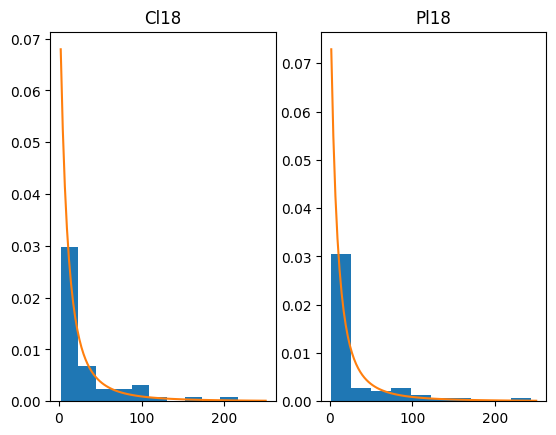

In [51]:
h1 = pd.read_excel('US-HurrDamage-Landsea-etal-2018.xlsx')
h2 = h1.set_index(['Year'])
h3 = h2 / 10**9
h4 = h3[(h3['PL18 Sum for Year'] >2) & (h3['CL18 Sum for Year'] >2)]

Pl18 = h4['PL18 Sum for Year'].values
Cl18 = h4['CL18 Sum for Year'].values
shape1, loc1, scale1 = genpareto.fit(Pl18)
shape2, loc2, scale2 = genpareto.fit(Cl18)
x1 = np.linspace(loc1, 250, 100)
x2 = np.linspace(loc2, 250, 100)

pdf1 = genpareto.pdf(x1, c=shape1, loc=loc1, scale=scale1)
pdf2 = genpareto.pdf(x2, c=shape2, loc=loc2, scale=scale2)
plt.subplot(1,2,2)
plt.hist(Pl18, density=True)
plt.plot(x1, pdf1)
plt.title('Pl18')
plt.subplot(1,2,1)
plt.hist(Cl18, density = True)
plt.plot(x2, pdf2)
plt.title('Cl18')

print('Shape, loc, and scale parameters for threshold 2 are', shape1, loc1, scale1)

Shape, loc, and scale parameters for threshold 6 are 0.6251979254257966 6.317866988214568 16.72424799209314


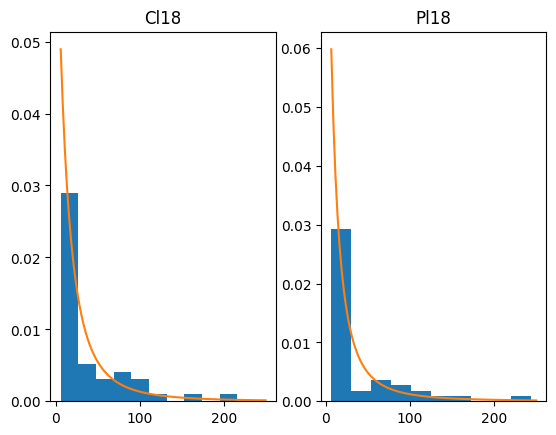

In [52]:
h1 = pd.read_excel('US-HurrDamage-Landsea-etal-2018.xlsx')
h2 = h1.set_index(['Year'])
h3 = h2 / 10**9
h4 = h3[(h3['PL18 Sum for Year'] >6) & (h3['CL18 Sum for Year'] >6)]

Pl18 = h4['PL18 Sum for Year'].values
Cl18 = h4['CL18 Sum for Year'].values
shape1, loc1, scale1 = genpareto.fit(Pl18)
shape2, loc2, scale2 = genpareto.fit(Cl18)
x1 = np.linspace(loc1, 250, 100)
x2 = np.linspace(loc2, 250, 100)

pdf1 = genpareto.pdf(x1, c=shape1, loc=loc1, scale=scale1)
pdf2 = genpareto.pdf(x2, c=shape2, loc=loc2, scale=scale2)
plt.subplot(1,2,2)
plt.hist(Pl18, density=True)
plt.plot(x1, pdf1)
plt.title('Pl18')
plt.subplot(1,2,1)
plt.hist(Cl18, density = True)
plt.plot(x2, pdf2)
plt.title('Cl18')

print('Shape, loc, and scale parameters for threshold 6 are', shape1, loc1, scale1)

#### Sensitivity: How parameters respond to change in threshold

In [53]:
h1 = pd.read_excel('US-HurrDamage-Landsea-etal-2018.xlsx')
h2 = h1.set_index(['Year'])
h3 = h2 / 10**9
h4 = h3[(h3['PL18 Sum for Year'] >8) & (h3['CL18 Sum for Year'] >8)]

Pl18 = h4['PL18 Sum for Year'].values
Cl18 = h4['CL18 Sum for Year'].values
shape1, loc1, scale1 = genpareto.fit(Pl18)
print('Shape, loc, and scale parameters for threshold  are', shape1, loc1, scale1)

Shape, loc, and scale parameters for threshold  are 1.4727607002186403 8.252290736791053 15.215094321032254


In [54]:
def sensitivity(threshold):
    h1 = pd.read_excel('US-HurrDamage-Landsea-etal-2018.xlsx')
    h2 = h1.set_index(['Year'])
    h3 = h2 / 10**9
    h4 = h3[(h3['PL18 Sum for Year'] >threshold) & (h3['CL18 Sum for Year'] >threshold)]
    Pl18 = h4['PL18 Sum for Year'].values
    shape1, loc1, scale1 = genpareto.fit(Pl18)
    return shape1, scale1

shape = []
scale = []
for i in range(50):
    shape_list, scale_list = sensitivity(i)
    shape.append(shape_list)
    scale.append(scale_list)


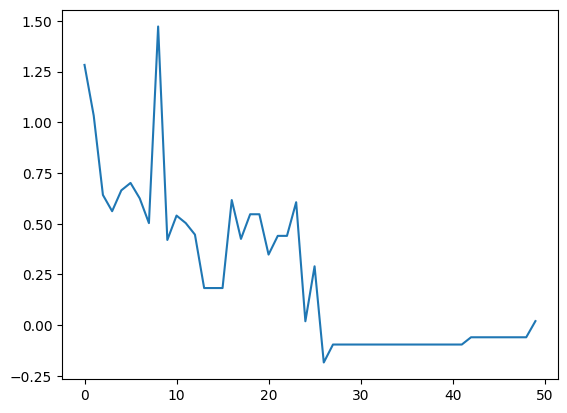

In [55]:
shape
plt.plot(shape)

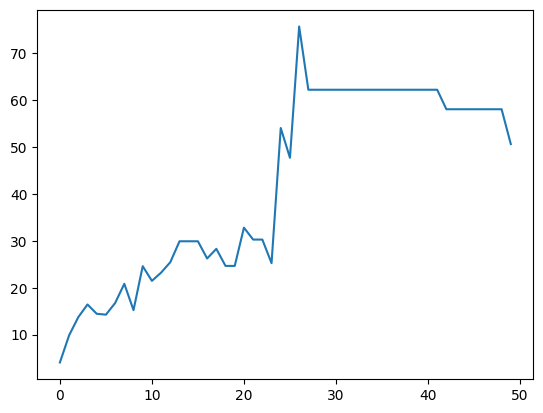

In [56]:
scale
plt.plot(scale)

#### The sensitivity of the model in terms of parameters appears to stabilize around 30. Thus, 30 would be an apt threshold

### Problem 10

In [57]:
india_rainfall = pd.read_csv('allIndia-JJAS-1901-2016.txt', delimiter=' ')
years = np.linspace(1901, 2016, 116)
india_rainfall = india_rainfall.set_index(years)
india_rainfall

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V4955,V4956,V4957,V4958,V4959,V4960,V4961,V4962,V4963,V4964
1901.0,50.730038,36.251213,18.626305,8.563210,69.819901,72.651321,17.895527,14.154114,6.651095,2.192934,...,3.960000,3.960000,3.960000,3.960000,3.960000,3.960000,3.960000,3.960000,3.960000,3.960000
1902.0,53.193268,36.793221,13.654750,5.371118,81.375824,74.152847,14.719666,9.619497,1.118188,2.475685,...,3.510000,3.510000,3.510000,3.510000,3.510000,3.510000,3.510000,3.510000,3.510000,3.510000
1903.0,55.505627,38.157845,15.402731,6.673742,83.454140,76.016418,17.976551,13.696713,4.596892,2.991419,...,6.870000,6.870000,6.870000,6.870000,6.870000,6.870000,6.870000,6.870000,6.870000,6.870000
1904.0,83.346169,57.909809,17.396698,9.458330,103.440170,111.126442,24.619595,11.908567,4.438385,3.070257,...,3.700000,3.700000,3.700000,3.700000,3.700000,3.700000,3.700000,3.700000,3.700000,3.700000
1905.0,53.142902,32.728706,14.840498,6.329170,95.554611,69.701996,12.232794,8.562581,3.331980,0.955363,...,7.099998,7.099998,7.099998,7.099998,7.099997,7.099997,7.099998,7.099997,7.099997,7.099997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012.0,58.516724,58.843525,58.392895,57.485157,57.257030,58.897327,61.184883,61.094566,60.110619,57.797810,...,35.742260,34.666367,33.705070,33.000912,32.798931,33.028633,35.643669,34.668282,33.813923,33.318077
2013.0,64.629982,46.641991,14.627108,5.494003,107.169350,83.482063,44.682327,3.987300,0.453586,0.056011,...,22.204126,23.692430,25.033182,26.088480,26.806637,27.168320,22.345182,23.693047,24.882244,25.838352
2014.0,48.813370,38.894375,7.654865,5.693645,97.052872,75.860329,38.833107,10.385138,4.264204,2.790398,...,19.356777,21.262203,22.998552,24.517593,25.867666,27.108761,19.540340,21.263437,22.887955,24.382883
2015.0,68.234604,45.210030,11.437782,8.278476,83.296730,77.466064,36.423687,9.867753,8.843477,1.513240,...,36.016975,36.704651,37.316612,37.745964,37.901508,37.764965,36.089668,36.711067,37.224102,37.565022


#### Each column is one .25 x .25 area

In [58]:
lat_lon = pd.read_csv('lon-lat-India-025grid.txt', delimiter=' ', header=None)
lat_lon.columns = ['Longitude', 'Latitude']
lat_lon

,Longitude,Latitude
0,8.25,77.00
1,8.25,77.25
2,8.25,77.50
3,8.25,77.75
4,8.50,76.75
...,...,...
4959,37.00,75.50
4960,37.25,74.50
4961,37.25,74.75
4962,37.25,75.00


#### a) Compute the Mann-Kendall Trend in Rainfall at Each Grid and Plot the Trends, along with the statistical significance at 95% confidence level

In [59]:
trend_all = []
p_value_all = []
slope_all = []

for column in india_rainfall:
    grid = np.array(india_rainfall[column].values)
    mk_result = mk.original_test(grid)
    trend = mk_result.trend
    trend_all.append(trend)
    p_value = mk_result.p
    p_value_all.append(p_value)
    slope = mk_result.slope
    slope_all.append(slope)

Text(0.5, 1.0, 'P_value per grid')

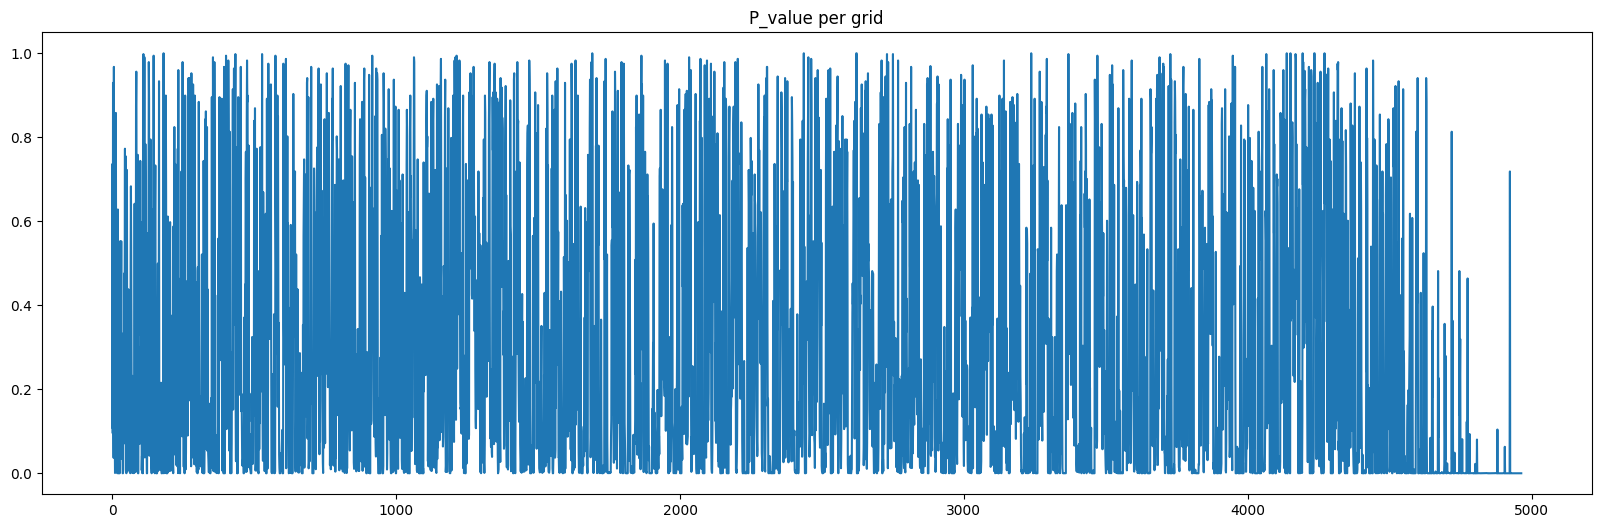

In [60]:
plt.figure(figsize=(20, 6))
sns.lineplot(p_value_all)
plt.title('P_value per grid')

<Axes: ylabel='Count'>

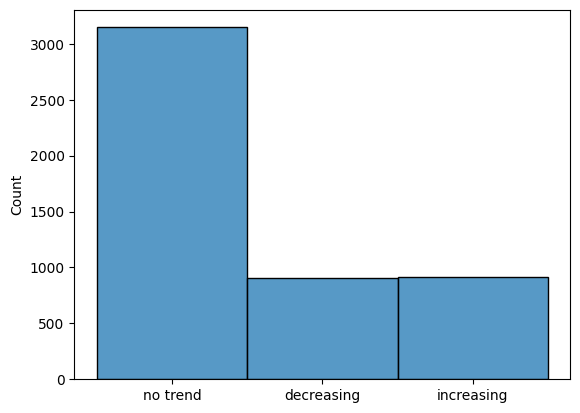

In [61]:
sns.histplot(trend_all)

#### B) Repeat a for the recent period 1980 through 2016

In [62]:
india_rainfall_recent = india_rainfall.iloc[79:116]
india_rainfall_recent

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V4955,V4956,V4957,V4958,V4959,V4960,V4961,V4962,V4963,V4964
1980.0,45.946228,37.137093,13.900354,2.955365,75.537460,63.675270,46.654930,2.435752,5.742099,1.793650,...,35.766151,36.515450,36.985004,36.734047,35.779861,34.614491,35.697151,36.320087,36.537735,36.151237
1981.0,80.121170,61.490814,12.337578,6.901121,112.682213,112.961288,82.920547,13.452353,7.741923,6.164375,...,27.464319,25.826679,24.203373,22.578413,21.380009,21.343460,27.318462,25.727976,24.164597,22.764931
1982.0,39.930470,31.801121,2.468921,2.739864,74.334427,63.148415,43.867989,6.277899,4.272225,1.965598,...,17.352112,18.768511,19.780363,19.987814,19.485592,18.734341,17.347282,18.571575,19.272882,19.364771
1983.0,32.267021,28.619400,1.675267,1.770460,75.608047,51.250141,38.969841,5.923909,2.340945,1.546120,...,31.296261,30.163147,29.141535,28.417517,28.363586,28.858372,31.196949,30.169245,29.249598,28.828583
1984.0,31.372137,34.499138,6.822138,4.440023,39.076927,54.826458,42.128773,8.411811,6.207613,1.242876,...,28.882807,29.910608,30.831600,30.961834,30.097889,28.395090,28.998486,29.917261,30.421337,30.277155
1985.0,32.715218,33.814354,4.287132,8.975667,66.197655,54.052185,57.616650,8.874224,7.740505,6.800162,...,14.675407,16.094576,17.382549,18.151234,18.064426,17.089256,14.815050,16.098799,17.129414,17.595156
1986.0,31.026266,23.087147,1.762356,4.310159,55.392956,41.579708,38.068512,8.627912,2.518338,3.301237,...,17.806604,18.278131,18.710804,19.075367,19.473530,20.272104,17.849171,18.284306,18.668249,19.038921
1987.0,42.910820,28.745321,8.368188,5.238595,75.393471,51.157814,41.771744,8.495943,6.949023,1.579894,...,7.721274,10.475956,12.972445,15.140051,17.061497,19.134262,7.984972,10.469893,12.802196,14.927162
1988.0,70.058357,45.484818,11.082533,7.854766,111.763062,82.251884,68.369980,13.661746,10.243135,1.570557,...,61.375164,58.733788,55.766468,52.730541,49.968830,47.885254,60.891174,58.341084,55.533123,52.756683
1989.0,60.489632,45.362911,7.235189,6.036832,104.965416,94.494339,75.461685,10.847754,9.349998,0.836031,...,40.041164,39.766563,38.918022,37.398830,35.525372,33.781544,39.894459,39.416634,38.401970,36.956112


In [63]:
trend_all = []
p_value_all = []
slope_all = []

for column in india_rainfall_recent:
    grid = np.array(india_rainfall_recent[column].values)
    mk_result = mk.original_test(grid)
    trend = mk_result.trend
    trend_all.append(trend)
    p_value = mk_result.p
    p_value_all.append(p_value)
    slope = mk_result.slope
    slope_all.append(slope)

Text(0.5, 1.0, 'P_value per grid')

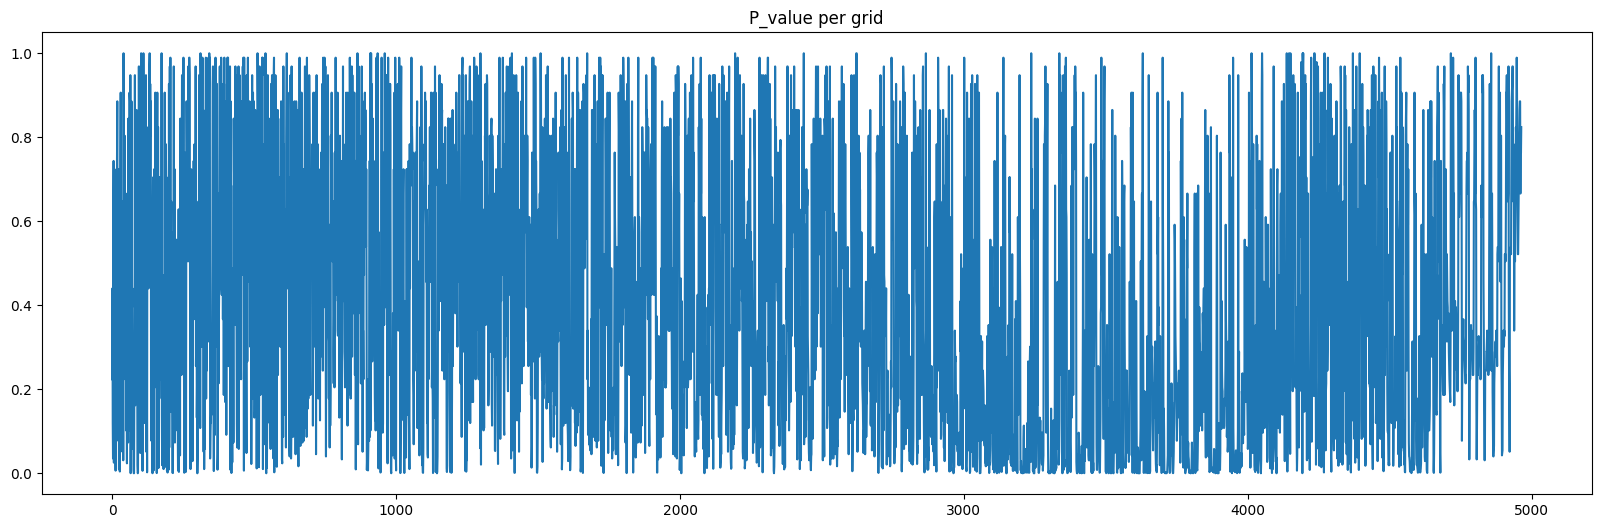

In [64]:
plt.figure(figsize=(20, 6))
sns.lineplot(p_value_all)
plt.title('P_value per grid')

<Axes: ylabel='Count'>

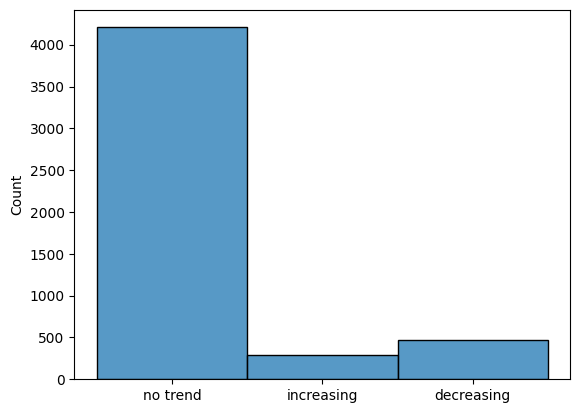

In [65]:
sns.histplot(trend_all)

### there is a higher proportion of decreasing trends, a lower portion of increasing trends, and a higher prortion of no trend from 1980 - 2016

### (C) Correlate summer ENSO index with summer season rainfall at each grid and spatially map the correltation values. Do this for the entire period and recent period

In [82]:
ensoindex = np.loadtxt('NINO34-JJAS-average-1906-2016.txt')
correlation = india_rainfall.corrwith(pd.Series(ensoindex))
correlation

V1      NaN
V2      NaN
V3      NaN
V4      NaN
V5      NaN
         ..
V4960   NaN
V4961   NaN
V4962   NaN
V4963   NaN
V4964   NaN
Length: 4964, dtype: float64

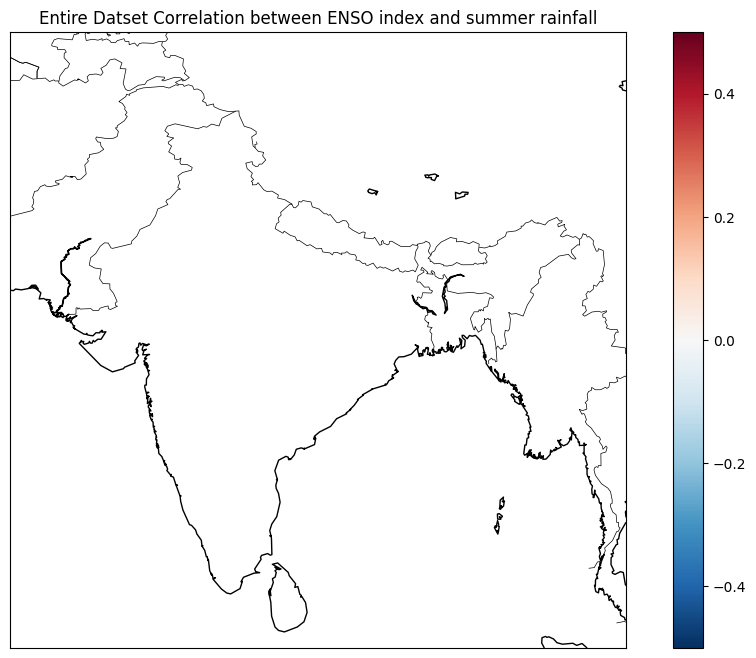

In [67]:
plt.figure(figsize=(12, 8))
m = Basemap(llcrnrlon=65, llcrnrlat=5, urcrnrlon=100, urcrnrlat=40, resolution='l')
m.drawcoastlines()
m.drawcountries()
sc = m.scatter(lat_lon['Latitude'], lat_lon["Longitude"], c=correlation, cmap='RdBu_r', vmin=-0.5, vmax=0.5)
plt.colorbar(sc)
plt.title('Entire Datset Correlation between ENSO index and summer rainfall')
plt.show()

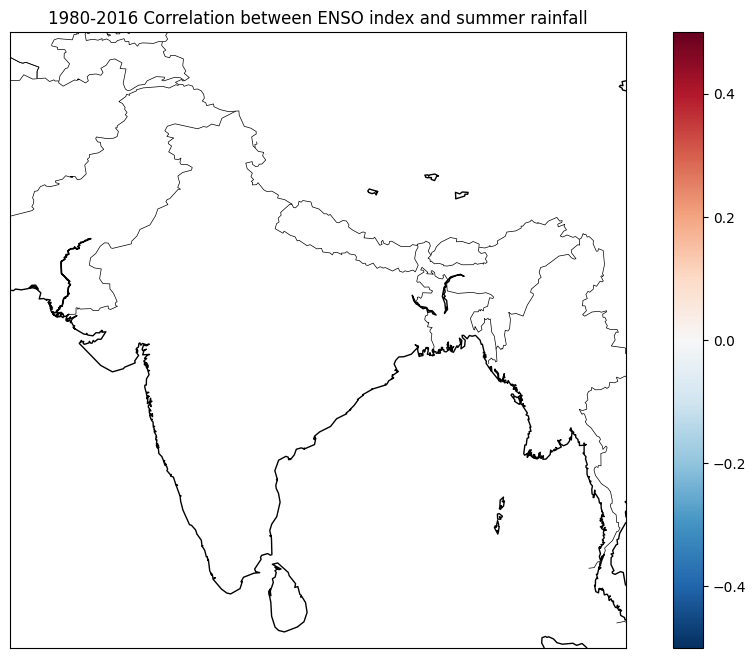

In [68]:
ensoindex = np.loadtxt('NINO34-JJAS-average-1906-2016.txt')

india_rainfall_recent = india_rainfall.iloc[79:116]
india_rainfall_recent

correlation = india_rainfall_recent.corrwith(pd.Series(ensoindex))
correlation

plt.figure(figsize=(12, 8))
m = Basemap(llcrnrlon=65, llcrnrlat=5, urcrnrlon=100, urcrnrlat=40, resolution='l')
m.drawcoastlines()
m.drawcountries()
sc = m.scatter(lat_lon['Latitude'], lat_lon["Longitude"], c=correlation, cmap='RdBu_r', vmin=-0.5, vmax=0.5)
plt.colorbar(sc)
plt.title('1980-2016 Correlation between ENSO index and summer rainfall')
plt.show()

### d) Compute all india rainfall. Select the top 10% years with high rainfall and the bottom 10% with low rainfall. Compute the rainfall average over these years at each grid point and plot them as spatial maps for the high and low rainfall years seperately. These are called 'Composite' maps and will show the spatial pattern of rainfall during an all india wet or all india dry year

In [69]:
rainfall_sum = pd.DataFrame(india_rainfall.sum(axis = 1))
rainfall_sum.columns = ['Rainfall']
rainfall_sum_df = rainfall_sum.sort_values(by='Rainfall')
rainfall_sum
# india_rainfall


,Rainfall
1901.0,366481.871451
1902.0,393284.465366
1903.0,425838.578028
1904.0,369152.822739
1905.0,355916.966799
...,...
2012.0,412547.894697
2013.0,459690.894257
2014.0,380735.795012
2015.0,379149.423589


In [70]:
#Top 10% of 116 rows is ~top 12 and bottom twelve rows
india_rainfall_bottom_ten = rainfall_sum_df.iloc[0:11]
india_rainfall_top_ten = rainfall_sum_df.iloc[105:116]
india_rainfall_top_ten


,Rainfall
1994.0,469209.479552
1970.0,471209.326068
1916.0,472689.818231
1959.0,475243.336945
1942.0,477813.067302
1983.0,478218.887140
1933.0,486348.132600
1961.0,490948.388437
1975.0,493833.060795
1988.0,500541.421429


In [71]:
# average_bottom = india_rainfall_bottom_ten / 4964
# average_bottom = np.array(average_bottom)
# average_top = india_rainfall_bottom_ten / 4964
# average_top = np.array(average_top)
# average_top
bottom = india_rainfall_bottom_ten.join(india_rainfall)
bottom = bottom.drop('Rainfall', axis = 1)
bottom = bottom.mean()
top = india_rainfall_top_ten.join(india_rainfall)
top = top.drop('Rainfall', axis = 1)
top = top.mean()
top

V1       62.399903
V2       47.510405
V3       14.388475
V4        7.919848
V5       97.068319
           ...    
V4960    25.380386
V4961    39.943183
V4962    36.649006
V4963    33.498949
V4964    30.599373
Length: 4964, dtype: float64

In [72]:
bottom

V1       53.497521
V2       40.077467
V3       10.232638
V4        6.358588
V5       76.780305
           ...    
V4960    16.076716
V4961    21.164491
V4962    20.209163
V4963    19.156270
V4964    18.076583
Length: 4964, dtype: float64

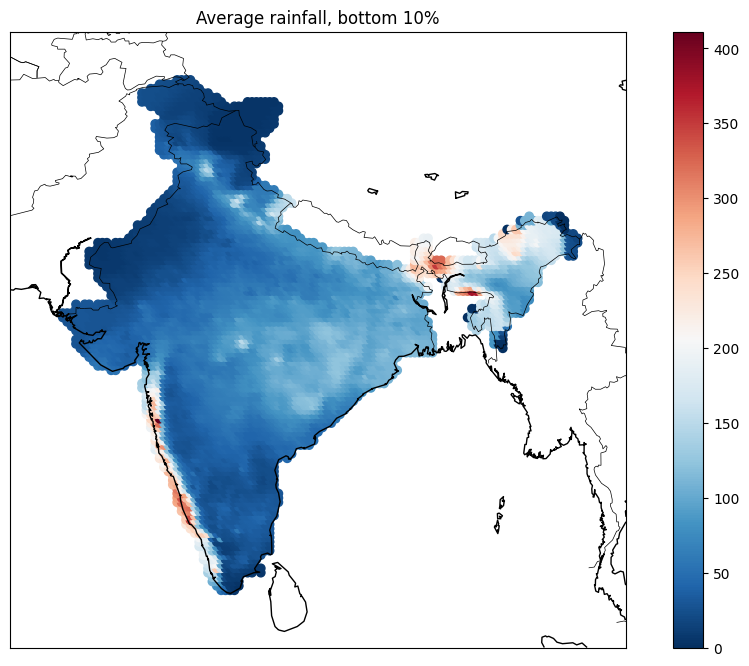

In [73]:
plt.figure(figsize=(12, 8))
m = Basemap(llcrnrlon=65, llcrnrlat=5, urcrnrlon=100, urcrnrlat=40, resolution='l')
m.drawcoastlines()
m.drawcountries()
sc = m.scatter(lat_lon['Latitude'], lat_lon["Longitude"], c=bottom, cmap='RdBu_r', vmin=bottom.min(), vmax=bottom.max())
plt.colorbar(sc)
plt.title('Average rainfall, bottom 10%')
plt.show()

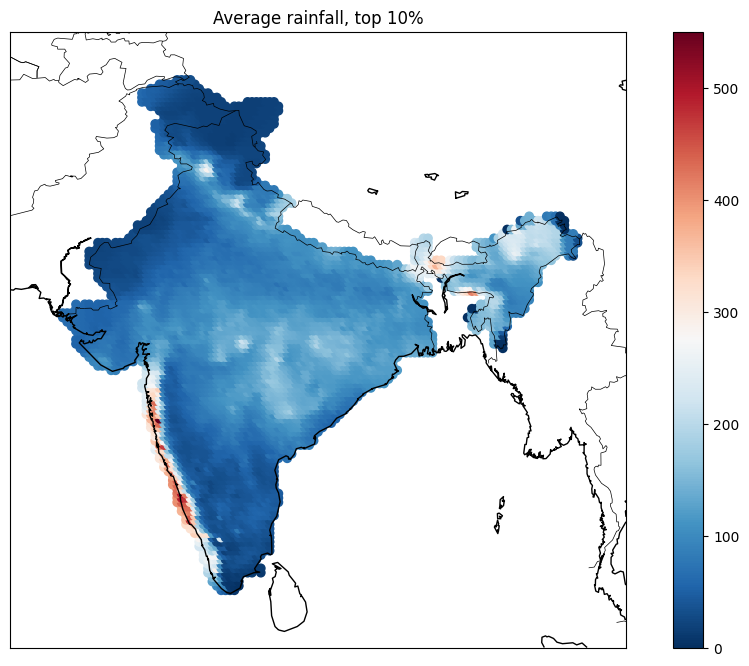

In [74]:
plt.figure(figsize=(12, 8))
m = Basemap(llcrnrlon=65, llcrnrlat=5, urcrnrlon=100, urcrnrlat=40, resolution='l')
m.drawcoastlines()
m.drawcountries()
sc = m.scatter(lat_lon['Latitude'], lat_lon["Longitude"], c=top, cmap='RdBu_r', vmin=top.min(), vmax=top.max())
plt.colorbar(sc)
plt.title('Average rainfall, top 10%')
plt.show()

### Problem 11)

#### (A) Scatterplot spring flow with all the potential predictor variables and apply a default smoother in R to smooth the scatterplot and comment on the relationships you see (linear, nonlinear etc.).

In [75]:
spring_flow = lee_ferry[['Apr', 'May', 'June', 'July']]
spring_flow.reset_index(inplace=True)
El_Nino = pd.read_csv('NINO34-summer-1906-2016.txt', delimiter=' ', header=None)
El_Nino.columns = ['Southern_Oscillation']
spring_flow = spring_flow.drop('Year', axis = 1)

In [84]:
combined_all = pd.concat([El_Nino, spring_flow], axis=1)
combined_all

,Southern_Oscillation,Apr,May,June,July
0,0.110350,1204640,3635101,5014167,2950460
1,0.529225,1465838,2702179,5967232,5103491
2,-0.414587,1041224,1595614,2922360,1924283
3,-0.254512,1120492,3349297,7203254,4109919
4,-0.872450,1730475,3298793,3101705,1373125
...,...,...,...,...,...
106,0.626923,1222586,1362700,1079225,744933
107,-0.086700,546319,1965060,1964812,874772
108,0.446367,1269132,2932034,3933465,1527985
109,1.973837,852287,2115387,4265586,1651282


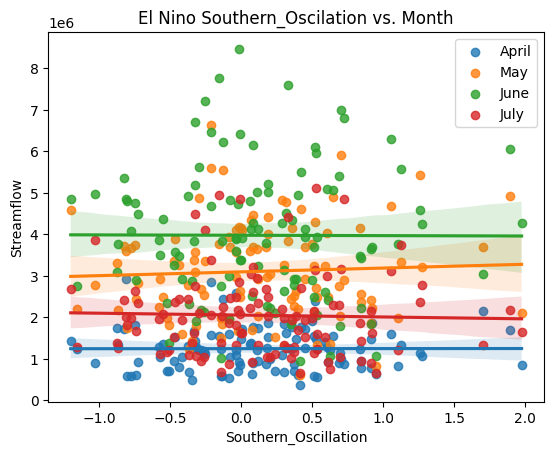

In [85]:
sns.regplot(x='Southern_Oscillation', y='Apr', data = combined_all, label='April')
sns.regplot(x='Southern_Oscillation', y='May', data = combined_all, label = 'May')
sns.regplot(x='Southern_Oscillation', y='June', data = combined_all, label = 'June')
sns.regplot(x='Southern_Oscillation', y='July', data = combined_all, label = 'July')
plt.title('El Nino Southern_Oscilation vs. Month')
plt.ylabel('Streamflow')
plt.legend()


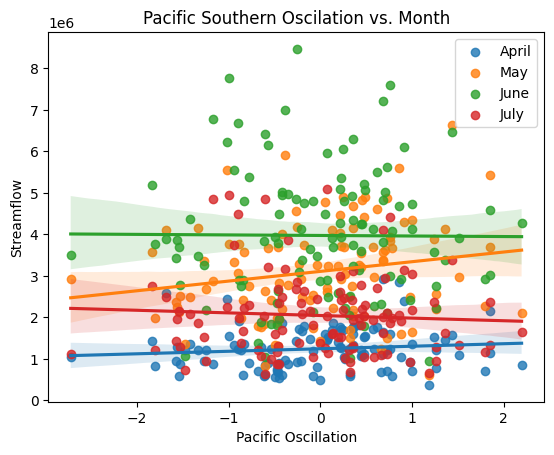

In [86]:
PDO = pd.read_csv('PDO-winter-1906-2016.txt', delimiter=' ', header=None)
PDO.fillna(0)
PDO = pd.DataFrame(PDO.stack())
PDO.reset_index(inplace=True)
PDO = PDO.drop(['level_0', 'level_1'], axis = 1)
PDO.columns = ['Pacific Oscillation']
PDO
combined = pd.concat([PDO, spring_flow], axis=1)
combined
sns.regplot(x='Pacific Oscillation', y='Apr', data = combined, label='April')
sns.regplot(x='Pacific Oscillation', y='May', data = combined, label = 'May')
sns.regplot(x='Pacific Oscillation', y='June', data = combined, label = 'June')
sns.regplot(x='Pacific Oscillation', y='July', data = combined, label = 'July')
plt.title('Pacific Southern Oscilation vs. Month')
plt.ylabel('Streamflow')
plt.legend()


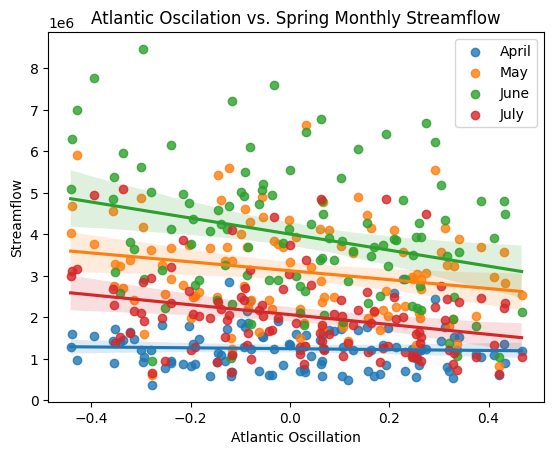

In [87]:
AMO = pd.read_csv('AMO-winter-1906-2016.txt', delimiter=' ', header=None)
AMO.fillna(0)
AMO = pd.DataFrame(AMO.stack())
AMO.reset_index(inplace=True)
AMO = AMO.drop(['level_0', 'level_1'], axis = 1)
AMO.columns = ['Atlantic Oscillation']
AMO
combined = pd.concat([AMO, spring_flow], axis=1)
combined
sns.regplot(x='Atlantic Oscillation', y='Apr', data = combined, label='April')
sns.regplot(x='Atlantic Oscillation', y='May', data = combined, label = 'May')
sns.regplot(x='Atlantic Oscillation', y='June', data = combined, label = 'June')
sns.regplot(x='Atlantic Oscillation', y='July', data = combined, label = 'July')
plt.title('Atlantic Oscilation vs. Spring Monthly Streamflow')
plt.ylabel('Streamflow')
plt.legend()

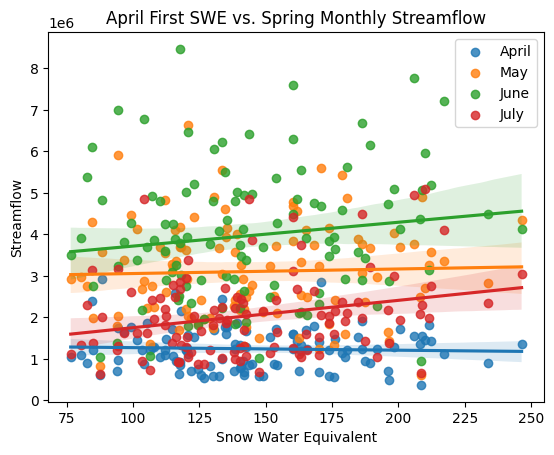

In [88]:
SWE = pd.read_csv('Mar1-and-Apr1-SWE-1906-2016.txt', delimiter=' ', header=None)
SWE.fillna(0)
SWE = pd.DataFrame(SWE.stack())
SWE.reset_index(inplace=True)
SWE = SWE.drop(['level_0', 'level_1'], axis = 1)
SWE.columns = ['Snow Water Equivalent']
SWE
combined = pd.concat([SWE, spring_flow], axis=1)
combined
sns.regplot(x='Snow Water Equivalent', y='Apr', data = combined, label='April')
sns.regplot(x='Snow Water Equivalent', y='May', data = combined, label = 'May')
sns.regplot(x='Snow Water Equivalent', y='June', data = combined, label = 'June')
sns.regplot(x='Snow Water Equivalent', y='July', data = combined, label = 'July')
plt.title('April First SWE vs. Spring Monthly Streamflow')
plt.ylabel('Streamflow')
plt.legend()

#### El Nino and PSO have no real relationship. AO has a slight negative relationship, and SWE has a slight positive relationship 

#### (B)

In [125]:
combined_all_predictors =  pd.concat([combined_all, AMO, SWE, PDO], axis=1)
combined_all_predictors = combined_all_predictors.fillna(0)
combined_all_predictors
predictors = combined_all_predictors[['Southern_Oscillation', 'Atlantic Oscillation', 'Snow Water Equivalent', 'Pacific Oscillation']]
predictors
# print('Dr. Balaji - Your data is not all the same size. It must be in order to run these functions. I added in zeros \n to standardize. It may effect results. \n SWE has many more data points than the other predtictors \n I could chop off the SWE data as well but unsure what approach makes sense')

,Southern_Oscillation,Atlantic Oscillation,Snow Water Equivalent,Pacific Oscillation
0,0.110350,-0.279944,120.11,0.708
1,0.529225,-0.336088,210.08,0.068
2,-0.414587,-0.294875,180.01,0.886
3,-0.254512,-0.116893,217.26,0.682
4,-0.872450,-0.351587,114.74,-0.236
...,...,...,...,...
217,0.000000,0.000000,144.06,0.000
218,0.000000,0.000000,117.21,0.000
219,0.000000,0.000000,140.35,0.000
220,0.000000,0.000000,129.79,0.000


In [123]:
columns = predictors.columns
Y = np.array(combined_all_predictors['Apr'])
names_final = []
aic_final = []  # Storing AIC for each combination
models_final = []  # Store fitted models

for i in range(1, len(columns) + 1):
    combinations = itertools.combinations(columns, i)
    for combination in combinations:
        # Create a DataFrame with the selected columns from X
        subset_df = combined_all_predictors[list(combination)]
        
        # Add a constant to the model (for the intercept)
        subset_df = sm.add_constant(subset_df)
        
        # Fit the OLS model
        model = sm.OLS(Y, subset_df).fit()
        
        # Store the AIC and model
        aic = model.aic
        names_final.append(combination)
        aic_final.append(aic)
        models_final.append(model)

results_df = pd.DataFrame({'Combination': names_final, 'AIC': aic_final})
# print(results_df)

sorted_results = results_df.sort_values(by='AIC').reset_index(drop=True)

best_model_idx = sorted_results.index[0]
best_combination = sorted_results.iloc[0]['Combination']
best_model = models_final[best_model_idx]

next_best_model_idx = sorted_results.index[1]
next_best_combination = sorted_results.iloc[1]['Combination']
next_best_model = models_final[next_best_model_idx]

print(f"Best Model (AIC: {sorted_results.iloc[0]['AIC']}): {best_combination}")
print(f"Next Best Model (AIC: {sorted_results.iloc[1]['AIC']}): {next_best_combination}")

best_coefficients = best_model.params
next_best_coefficients = next_best_model.params

print("\nBest Model Coefficients:")
print(best_coefficients)

print("\nNext Best Model Coefficients:")
print(next_best_coefficients)


Best Model (AIC: 6615.314763214887): ('Southern_Oscillation',)
Next Best Model (AIC: 6617.104206292039): ('Southern_Oscillation', 'Pacific Oscillation')

Best Model Coefficients:
const                   609138.764596
Southern_Oscillation    208579.605673
dtype: float64

Next Best Model Coefficients:
const                   621847.793036
Atlantic Oscillation     89300.501426
dtype: float64


In [ ]:
predictors = ['te', 'rain']
response = 'loght'
residuals_final = []
combo_names = []
for r in range(1, len(predictors) + 1):
    for combo in combinations(predictors, r):
        formula = f"{response} ~ {' + '.join(combo)}"
        model = smf.ols(formula=formula, data=p_heights_northern).fit()
        anova_results = sm.stats.anova_lm(model, typ=2)
        print(f"\nFormula: {formula}")
        # residuals = model.resid
        # combo_names.append(combo)
        # residuals_final
        print(anova_results)